# DATA271 Final Project – Impact of Weather Patterns on Swainson Hawk Migration in California
---

## Research Details
---

### Introducing the Problem
This project performs a statistical investigative process to explore and analyze the Swainson hawk tracking data from GBIF and Movebank, alongside meteorological datasets across multiple years. The goal in this notebook will be to identify environmental factors that influence their movement patterns across California. We aim to understand how temperature, precipitation, and other atmospheric conditions affect **when** and **where** these birds migrate—and whether these patterns are shifting in response to broader climate variability or relationships with their natural prey. The articles below come from reputable sources which address this concern in more detail:

- **[National Environmental Education Foundation article: “How Climate Change Is Changing Animal Habits”](https://www.neefusa.org/story/climate-change/how-climate-change-changing-animal-habits)** – NEEF is the nation’s leading organization in lifelong environmental learning, creating opportunities for people of all ages to experience and learn about the environment in ways that improve their lives and the health of the planet.  
- **[BioMed Central publication: “Climate-change impacts on animal migration”](https://climatechangeresponses.biomedcentral.com/articles/10.1186/s40665-015-0013-9)** – BMC publishes 250+ open-access journals, advancing progress in biology, health sciences, and medicine.  
- **[University of Maryland Division of Research publication: “Global-scale Animal Ecology Reveals Behavioral Changes in Response to Climate Change”](https://research.umd.edu/articles/global-scale-animal-ecology-reveals-behavioral-changes-response-climate-change)** – Highlights the UMD research enterprise’s contribution to understanding climate-driven behavioral shifts.  
- **[National Institutes of Health article: “Crossing regimes of temperature dependence in animal movement”](https://pubmed.ncbi.nlm.nih.gov/26854767/)** – NIH research linking temperature, metabolism, and movement dynamics.
- **[UC Santa Cruz news article about climate shifts and animal relocation](https://www.scientificamerican.com/article/climate-change-is-driving-animal-migration/)** - UCSC article on climate shifts and the impact it has on animal relocation 

Animals movements are mainly attributed to **food and water**, **safety**, and broader **migratory cycles**, all of which are influenced by weather and climate signals that can disrupt internal timing mechanisms. With climate change becoming a larger discussion, we hope to identify discrepancies in typical flight patterns that could potentially be caused by environmental variable variation.

Again, the species I’ll be investigating in particular are *Swainson’s Hawks (Buteo swainsoni)* and their primary food source, *Grasshoppers (Acrididae)*. I chose them because (i) high-quality data are available within the target time frame, (ii) both are extensively tracked in California, and (iii) birds provide direct insight into atmospheric effects like flight behavior and cover long distances quickly, which can help recognize flight patterns. I sourced the tracking data from Movebank’s digital library of archived studies, along with GBIF's repository of occurrence data from indiviudals and machines.

I'll list a couple of resources in case you're curious about the subjects of my analysis, both contain data related to the species and details worth keeping in mind while conducting my analysis on their movements.

- **[California Department of Fish and Wildlife report on Swainson Hawks](https://wildlife.ca.gov/Conservation/Birds/Swainsons-Hawk)**
- **[UC Statewide IPM PDF on Grasshoppers](https://ipm.ucanr.edu/legacy_assets/PDF/PESTNOTES/pngrasshoppers.pdf)**

Below is the Movebank study I'll be siphoning the data from, since researchers are allowed to send their data to Movebank for peer review and publishing to their site, which will provide public biodiversity data to the general public.

- **[Space use by Swainson's hawk (Buteo swainsoni) in the Natomas Basin, California](https://datarepository.movebank.org/entities/datapackage/fb9f260b-b3fa-4c3b-a059-847341c43998)** – GPS-tracked Swainson’s Hawks ranged widely (87–172 km²) but focused activity in grassland and alfalfa; space-use intensity was unaffected by sex, offspring stage, or nest success.  

For context, Movebank is a free, web-based platform (launched 2007) where researchers upload, manage, analyze, share, and archive animal-tracking data. Hosted by the Max Planck Institute of Animal Behavior with U.S. and German partners, it offers live data feeds, Env-DATA environmental annotation, MoveApps no-code workflows, REST/R APIs, and a DOI-granting repository. As of early 2025 it hosts **9 000+ studies**, **1 500+ species**, and roughly **8 billion** location records (~11 million new positions daily).

We'll also be using the **Global Biodiversity Information Facility (GBIF)** to provide species and occurrence data, adding to our repository of geospatial tracking data overtime. The Global Biodiversity Information Facility (GBIF) is an international open-data infrastructure funded by governments worldwide. Its mission is to provide free and open access to biodiversity data collected across the globe, helping researchers, policymakers, and conservationists better understand and protect life on Earth.

In regard to the climatological and meterological data we'll be pairing with our animal tracking records, I'll be using the **National Oceanic and Atmospheric Administration (NOAA)** to gather values associated with weather readings that are collected across multiple sites in California. The National Oceanic and Atmospheric Administration (NOAA) is a scientific agency within the U.S. Department of Commerce. It focuses on the conditions of the oceans, major waterways, and the atmosphere, and plays a vital role in monitoring environmental systems and delivering real-time data for public and scientific use.

By integrating Movebank tracks with data from the CDFW and records from the NOAA, this project seeks to uncover how atmospheric anomalies correlate with migration timing, routes, and habitat choices.

---

### Addressing the Problem
Our spatiotemporal analysis will join datasets on geographic coordinates and dates, exploring time-series trends in weather and movement (e.g., earlier arrivals during warmer winters or retreats from drought-affected regions). If possible, we’ll also test whether predator–prey interactions confound purely weather-driven explanations.

---

### Analysis Breakdown
We will ask:

- _Which atmospheric variables (temperature, precipitation, wind) correlate most strongly with migration timing or intensity?_
- _Are there climate thresholds or seasonal shifts that predict migratory events?_
- _Can spatial–temporal mapping reveal significant trends over time?_
- _How might continued climate variability affect future migration predictability?_
- _Do predator–prey relationships better explain some shifts than weather alone?_

Stages:

1. **Explore individual datasets** – Clean and summarize; generate baseline stats and visuals.  
2. **Analyze combined datasets** – Merge movement and climate data; create layered time-series plots and heat maps.  
3. **Evaluate significance and limits** – Assess correlation strength versus ecological plausibility.  
4. **Answer research questions** – Compare findings against initial hypotheses.  
5. **Recommendations & further exploration** – Suggest conservation actions and identify data gaps.

---

### Dataset Sources
1. [NOAA National Centers for Environmental Information](https://www.ncei.noaa.gov/) – Historical and real-time climate data  
2. [California Department of Fish and Wildlife](https://data-cdfw.opendata.arcgis.com/search?q=barn%20owl&tags=species) – Public CDFW spatial data  
3. [Movebank](https://www.movebank.org/) – Open animal-movement data across species  

---

### Libraries & Modules
- **Pandas** – Time-series wrangling, dataset merges, and general data manipulation  
- **Numpy** – Scientific computing and vectorized calculations  
- **Matplotlib & Seaborn** – Temporal and distributional visualizations (static plots)  
- **Plotly** – Interactive plots and geographic data visualization  
- **Plotnine** – Grammar of graphics for structured, layered visualizations (ggplot2-style)  
- **Geopandas** – Spatial joins and mapping of migration paths and weather zones  
- **pygbif** – Access to GBIF species, taxonomy, and occurrence data via API  
- **Requests** – HTTP requests for accessing web APIs (e.g., NOAA, GBIF)  
- **HTTPBasicAuth** – Authentication for APIs requiring secure access  
- **StringIO** – Parsing text-based API responses into pandas DataFrames  
- **datetime / timedelta** – Handling time deltas, date slicing, and datetime construction  
- **time / sleep** – Rate-limiting requests, simulating pauses for API pagination or throttling   

---

### Project Resources
- [GitHub Repository](https://github.com/toritotony/Data271FinalProject)


## Collecting Data

In [1]:
%%capture
!pip install plotnine geopandas pygbif

In [2]:
%%capture
!pip --upgrade pandas

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from plotnine import *
import geopandas
import plotly
import requests
from time import *
from requests.auth import HTTPBasicAuth
from io import StringIO
import time
from pygbif import species, registry, occurrences
from datetime import timedelta, datetime
from dateutil.parser import parse
import re
import warnings


Let's start by exploring the data available to us from GBIF, which we can hopefully use to gather data on the species we'll be studying, and their occurrences across California. First we'll look at the datasets; a GBIF dataset provides occurrence data, which will drive our analysis by allowing us to track their movements overtime. 

Publishing organizations register datasets in this Registry, and the data they reference is retrieved and indexed in GBIF's occurrence store on a regular schedule. We'll ideally be pairing this with Movebanks to have a diverse dataset with less bias towards a certain source.

Before that however, let's retrieve the taxon ids for our subjects

In [4]:
def get_taxon_key(scientific_name):
    response = requests.get(
        "https://api.gbif.org/v1/species/match",
        params={"name": scientific_name}
    )
    data = response.json()
    return data.get("usageKey")

hawk_gbif_key = get_taxon_key("Buteo swainsoni")
acrididae_gbif_key = get_taxon_key("Acrididae")

print(f"Swainson's Hawk taxonKey: {hawk_gbif_key}")
print(f"Acrididae taxonKey: {acrididae_gbif_key}")

Swainson's Hawk taxonKey: 2480562
Acrididae taxonKey: 9394


Now that we have the taxonKeys, let's use it for a dataset search on occurrences for Swainson Hawks

In [5]:
hawk_gbif_datasets = registry.dataset_search(taxonKey=hawk_gbif_key, type='OCCURRENCE')
for ds in hawk_gbif_datasets['results']:
    print(f"{ds['title']} (UUID: {ds['key']}) \n")

It looks like nothing comes up, let's try using the query parameter to account for datasets that have data but maybe didn't include the taxonKey

In [6]:
hawk_gbif_datasets = registry.dataset_search(q="Swainson Hawk", type='OCCURRENCE', publishingCountry="US")
for ds in hawk_gbif_datasets['results']:
    print(f"{ds['title']} (UUID: {ds['key']})")

Records of Hawk Moths (Sphingidae) from Vermont, USA (UUID: 97f3fa73-3195-4af9-a14e-07030f00db96)
Hawk Migration Association of North America - HawkCount (UUID: 8648fdbe-f762-11e1-a439-00145eb45e9a)
Ecological Baseline Studies of the U.S. Outer Continental Shelf Option Year 2 (UUID: 8bfd90da-4ab9-40a2-8c96-bd7c2c9e9fc5)
Ecological Baseline Studies of the U.S. Outer Continental Shelf Option Year 1 (UUID: 874ff2f9-f515-435b-afb1-bc282ef3fa67)


Let's do the same for grasshoppers, searching for occurrence data sets that include the name of our desired species, since taxonKey will likely not grab the whole set.

In [7]:
acrididae_gbif_datasets = registry.dataset_search(q="Grasshoppers", type='OCCURRENCE', publishingCountry="US")
for ds in acrididae_gbif_datasets['results']:
    print(f"{ds['title']} (UUID: {ds['key']})")

University of Michigan Museum of Zoology, Division of Insects (UUID: 13e7869e-0c76-473a-a227-53d6e3d6fbf2)
William F. Barr Entomological Museum (UUID: d4aea86c-bd2c-4526-ab57-c6a98dc057e5)
American Museum of Natural History (AMNH) Terrestrial Polyneoptera Collection (UUID: d475b3b1-1e5a-4d56-a547-f7afb810c4c5)


Now that we can confirm there are datasets containing occurrences for hawks and grasshoppers, we can start looking at the species information available from GBIF. Using the taxonKeys, their scientific name and common name, we can retrieve relevant information to the species that could help us later on

In [8]:
hawk_gbif_species = species.name_usage(key=hawk_gbif_key, language="eng")
print(hawk_gbif_species)

{'key': 2480562, 'nubKey': 2480562, 'nameKey': 1742843, 'taxonID': 'gbif:2480562', 'sourceTaxonKey': 172742067, 'kingdom': 'Animalia', 'phylum': 'Chordata', 'order': 'Accipitriformes', 'family': 'Accipitridae', 'genus': 'Buteo', 'species': 'Buteo swainsoni', 'kingdomKey': 1, 'phylumKey': 44, 'classKey': 212, 'orderKey': 7191147, 'familyKey': 2877, 'genusKey': 2480517, 'speciesKey': 2480562, 'datasetKey': 'd7dddbf4-2cf0-4f39-9b2a-bb099caae36c', 'constituentKey': '7ddf754f-d193-4cc9-b351-99906754a03b', 'parentKey': 2480517, 'parent': 'Buteo', 'scientificName': 'Buteo swainsoni Bonaparte, 1838', 'canonicalName': 'Buteo swainsoni', 'vernacularName': "Swainson's Hawk", 'authorship': 'Bonaparte, 1838', 'nameType': 'SCIENTIFIC', 'rank': 'SPECIES', 'origin': 'SOURCE', 'taxonomicStatus': 'ACCEPTED', 'nomenclaturalStatus': [], 'remarks': '', 'publishedIn': 'Bonaparte, C.L.J.L. (1838). A geographical and comparative list of the birds of Europe and North America.', 'numDescendants': 0, 'lastCrawle

Let's do the same for grasshoppers.

In [9]:
acrididae_gbif_species = species.name_usage(key=acrididae_gbif_key, language="eng")
print(acrididae_gbif_species)

{'key': 9394, 'nubKey': 9394, 'nameKey': 174293, 'taxonID': 'gbif:9394', 'sourceTaxonKey': 189946194, 'kingdom': 'Animalia', 'phylum': 'Arthropoda', 'order': 'Orthoptera', 'family': 'Acrididae', 'kingdomKey': 1, 'phylumKey': 54, 'classKey': 216, 'orderKey': 1458, 'familyKey': 9394, 'datasetKey': 'd7dddbf4-2cf0-4f39-9b2a-bb099caae36c', 'constituentKey': '7ddf754f-d193-4cc9-b351-99906754a03b', 'parentKey': 1458, 'parent': 'Orthoptera', 'scientificName': 'Acrididae', 'canonicalName': 'Acrididae', 'vernacularName': 'short-horned grasshopper', 'authorship': '', 'nameType': 'SCIENTIFIC', 'rank': 'FAMILY', 'origin': 'SOURCE', 'taxonomicStatus': 'ACCEPTED', 'nomenclaturalStatus': [], 'remarks': '', 'publishedIn': 'MacLeay, W.S. (1821) In Horae Entomologicae or Essays on the Annulose Animals. S. Bagster, London. Vol. 2. Available from http://www.biodiversitylibrary.org/item/103259#page/7/mode/1up', 'numDescendants': 10576, 'lastCrawled': '2023-08-22T23:20:59.545+00:00', 'lastInterpreted': '2023

It might be smart to define the bounds of California to narrow the data we're looking to extract

In [10]:
california_wkt = 'POLYGON((-124.48 32.53, -114.13 32.53, -114.13 42.01, -124.48 42.01, -124.48 32.53))'

Now, with the information suggesting that occurrence data is available for these animals, and given our CA bounds and the taxon keys, we can search for those occurrences and take a look. We'll be appending the data retrieved into a csv to save locally (to avoid rerunning this computationally heavy cell) and then import it as a dataframe in the next cell

In [11]:
def fetch_occurrences_to_csv(taxon_key, geometry, start_year, end_year, out_csv):
    offset = 0
    limit = 300
    first_write = True

    while True:
        response = occurrences.search(
            taxonKey=taxon_key,
            geometry=geometry,
            year=f"{start_year},{end_year}",
            hasCoordinate=True,
            limit=limit,
            offset=offset
        )

        results = response.get("results", [])
        if not results:
            break

        df_chunk = pd.json_normalize(results)
        df_chunk.to_csv(out_csv, mode='a', header=first_write, index=False)
        first_write = False

        offset += limit
        print(f"Wrote {len(df_chunk)} records at offset {offset}")
        time.sleep(1)

    print(f"Finished writing CSV to {out_csv}")

Now we'll call on this function for the Swainson Hawks, which will generate a pdf, which will be imported as a dataframe to avoid using the above function again (this cell takes roughly an hour to complete)

In [12]:
hawk_csv_path = "GBIF/SwainsonHawkGBIF.csv"
#fetch_occurrences_to_csv(hawk_gbif_key, california_wkt, 2013, 2023, hawk_csv_path)
hawk_df = pd.read_csv(hawk_csv_path, on_bad_lines='skip', low_memory=False)

Let's take a quick look at the head of the dataframe to make sure it was processed correctly. After collecting the datasets for our grasshoppers, we'll clean these and append them into a dataset to later incorporate in a singular dataset containing all occurrences or tracking updates for the animals we're investigating

In [14]:
hawk_df.head()

,key,datasetKey,publishingOrgKey,installationKey,hostingOrganizationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,...,georeferenceVerificationStatus,locality,municipality,identificationVerificationStatus,verbatimIdentification,individualCount,taxonConceptID,county,informationWithheld,lifeStage
0,4011915312,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2025-04-09T17:43:33.531+00:00,2025-04-16T10:20:29.885+00:00,530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4028968442,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2025-04-09T17:43:33.531+00:00,2025-04-16T10:22:46.194+00:00,530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4028827735,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2025-04-09T17:43:33.531+00:00,2025-04-16T04:40:59.287+00:00,530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4103303596,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2025-04-09T17:43:33.531+00:00,2025-04-16T04:37:20.170+00:00,530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4090593311,6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b,0c6d40e3-5d96-4a2d-9342-b02833aaa766,b07988d2-1b3d-4fdb-931a-2e852ddac2dd,0c6d40e3-5d96-4a2d-9342-b02833aaa766,GB,EML,2025-01-22T04:59:47.418+00:00,2025-02-01T20:15:49.245+00:00,11,...,Verified by data custodian,Pleasant Grove Waste Water Treatment Plant,Sabre City,Accepted,Buteo swainsoni,NaN,NaN,NaN,NaN,NaN


Likewise, let's also take a peak at the head of our Acrididae occurrence dataframe.

In [15]:
acrididae_csv_path = "GBIF/AcrididaeGBIF.csv"
#fetch_occurrences_to_csv(acrididae_gbif_key, california_wkt, 2013, 2023, acrididae_csv_path)
acrididae_df = pd.read_csv(acrididae_csv_path, on_bad_lines='skip', low_memory=False)

In [16]:
acrididae_df.head()

,key,datasetKey,publishingOrgKey,installationKey,hostingOrganizationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,...,gadm.level1.gid,gadm.level1.name,gadm.level2.gid,gadm.level2.name,lifeStage,occurrenceRemarks,infraspecificEpithet,informationWithheld,sex,identificationRemarks
0,4011493188,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2025-04-09T17:43:33.531+00:00,2025-04-16T04:26:05.332+00:00,530,...,USA.5_1,California,USA.5.33_1,Riverside,NaN,NaN,NaN,NaN,NaN,NaN
1,4014953736,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2025-04-09T17:43:33.531+00:00,2025-04-16T04:26:09.006+00:00,530,...,USA.5_1,California,USA.5.36_1,San Bernardino,NaN,NaN,NaN,NaN,NaN,NaN
2,4011801343,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2025-04-09T17:43:33.531+00:00,2025-04-16T10:20:30.305+00:00,530,...,USA.5_1,California,USA.5.56_1,Ventura,NaN,NaN,NaN,NaN,NaN,NaN
3,4014816815,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2025-04-09T17:43:33.531+00:00,2025-04-16T04:26:15.819+00:00,530,...,USA.5_1,California,USA.5.37_1,San Diego,NaN,NaN,NaN,NaN,NaN,NaN
4,4847044924,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2025-04-09T17:43:33.531+00:00,2025-04-16T04:26:20.761+00:00,530,...,USA.3_1,Arizona,USA.3.7_1,La Paz,NaN,NaN,NaN,NaN,NaN,NaN


Now that we've collected both the Swainson Hawk and Grasshopper occurrences, let's observe some properties of the data and clean it up before appending both to a main table containing both of their occurrences.

First we'll take a look at their column properties, including datatypes and the number of null values in each.

In [17]:
hawk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72250 entries, 0 to 72249
Columns: 106 entries, key to lifeStage
dtypes: int64(10), object(96)
memory usage: 58.4+ MB


In [18]:
acrididae_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 99 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   key                                                 9900 non-null   int64  
 1   datasetKey                                          9900 non-null   object 
 2   publishingOrgKey                                    9900 non-null   object 
 3   installationKey                                     9900 non-null   object 
 4   hostingOrganizationKey                              9900 non-null   object 
 5   publishingCountry                                   9900 non-null   object 
 6   protocol                                            9900 non-null   object 
 7   lastCrawled                                         9900 non-null   object 
 8   lastParsed                                          9900 non-null   object 
 9

There's lots of columns, and we probably don't need all of them. Let's take a look at the sum of null values for both dataframes without their being an output limit hopefully. Otherwise, we'll devise a function to remove the ones with many null values, or use our knowledge of the analysis to determine which will be most helpful. We'll be changing pandas options to see all the columns, since there are too many for it to include by default.

Also, we should keep into consideration that these are coming from multiple datasets, as we'll see later. We'll be splitting these data sets by their dataset key for each species, to make sure they all meet the same schema standard before combining again into one GBIF dataframe with all the relevant data necessary.

In [21]:
# set options for pandas to include full output
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't break lines
pd.set_option('display.max_colwidth', None) # Don't truncate column values

In [22]:
hawk_df.isna().sum()

key                                                       0
datasetKey                                                0
publishingOrgKey                                          0
installationKey                                           0
hostingOrganizationKey                                    0
publishingCountry                                         0
protocol                                                  0
lastCrawled                                               0
lastParsed                                                0
crawlId                                                   0
projectId                                              2407
basisOfRecord                                          2385
occurrenceStatus                                          0
taxonKey                                                  0
kingdomKey                                                0
phylumKey                                                 0
classKey                                

In [23]:
acrididae_df.isna().sum()

key                                                      0
datasetKey                                               0
publishingOrgKey                                         0
installationKey                                          0
hostingOrganizationKey                                   0
publishingCountry                                        0
protocol                                                 0
lastCrawled                                              0
lastParsed                                               0
crawlId                                                  0
projectId                                             2542
basisOfRecord                                            0
occurrenceStatus                                       259
taxonKey                                              1100
kingdomKey                                               0
phylumKey                                                0
classKey                                                

In [25]:
# Reset options set previously
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

Now that we know what columns exist and the number of null values, and after some consideration, we decided to keep the following columns that seem most relevant to our analysis, listed below in a Python list. We also kept extra columns that we could find helpful when cleaning the data to conform to one standard, such as other date-like columns and identifiers.

In [28]:
columns_to_keep = [
    "gbifID", "occurrenceID", "publishingOrgKey", "key", "datasetKey","scientificName", "decimalLatitude", "decimalLongitude", "dateIdentified", "startDayOfYear","endDayOfYear", "eventDate", "year", "month", "day", "eventTime", "coordinateUncertaintyInMeters", "occurrenceStatus", "lifeStage", "taxonID", "taxonRank"
]

Let's now filter these dataframes to only include these columns, and reduce them further 

In [29]:
hawk_df = hawk_df.loc[:, columns_to_keep]
acrididae_df = acrididae_df.loc[:, columns_to_keep]

We should split these by dataset keys, since we'll want to standardize them before combining them into a single GBIF dataset. We'll also be dividing these by hawk and grasshopper data, assuming that some datasets will contain records on occurrences for both species. Mainly, we'll want to make sure all the eventDates and eventTimes are in some standard before combining all hawk and grasshopper data from GBIF, so that errors cause a loss of data.

In [136]:
# We had previously used this function on a dataframe made later on gbif_df, in order to get all the unique dataset keys
# and provide us with more information on where this is all coming from, and how they might be formatting or collecting their data

# These dataset publishers will be cited at the end of the analysis and referenced throughout this notebook.

# IF YOU WOULD LIKE TO RUN THIS, MAKE SURE GBIF_DF IS ALREADY CREATED AND CLEANED FOR MORE DETAILS ON THE DATASETS BEING USED
#'''
unique_keys = gbif_df['datasetKey'].dropna().unique()

metadata_rows = []

for i in gbif_df.datasetKey.unique():
    try:
        response = requests.get("https://api.gbif.org/v1/dataset/" + i)
        response.raise_for_status() 
        data = response.json()       
        metadata_rows.append(data)
        print(i)
    except Exception as e:
        metadata_rows.append({'datasetKey': key, 'error': str(e)})
    
gbif_datasets = pd.json_normalize(metadata_rows)
gbif_datasets
#''';

50c9509d-22c7-4a22-a47d-8c48425ef4a7
6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b
4fa7b334-ce0d-4e88-aaae-2e0c138d049e
8a863029-f435-446a-821e-275f4f641165
b1047888-ae52-4179-9dd5-5448ea342a24


,key,installationKey,publishingOrganizationKey,doi,external,numConstituents,type,title,description,language,...,samplingDescription.sampling,additionalInfo,project.title,project.contacts,project.funding,project.awards,project.studyAreaDescription,project.designDescription,project.relatedProjects,project.abstract
0,50c9509d-22c7-4a22-a47d-8c48425ef4a7,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,10.15468/ab3s5x,False,0,OCCURRENCE,iNaturalist Research-grade Observations,<p>\n Observations from iNaturalist.org...,eng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b,b07988d2-1b3d-4fdb-931a-2e852ddac2dd,0c6d40e3-5d96-4a2d-9342-b02833aaa766,10.15468/6kud7x,False,0,OCCURRENCE,Birda - Global Observation Dataset,Occurrences of Animalia Chordata Aves recorded...,eng,...,Field observation by users of the Birda mobile...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,7182d304-b0a2-404b-baba-2086a325c221,e2e717bf-551a-4917-bdc9-4fa0f342c530,10.15468/aomfnb,False,0,OCCURRENCE,EOD – eBird Observation Dataset,eBird is a collective enterprise that takes a ...,eng,...,NaN,Data released annually. These data are made a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8a863029-f435-446a-821e-275f4f641165,a0e05292-3d09-4eae-9f83-02ae3516283c,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,10.15468/5nilie,False,0,OCCURRENCE,"Observation.org, Nature data from around the W...",<p>This dataset contains occurrence data of fl...,eng,...,NaN,,Observation.org data 1900-,"[{'type': 'ADMINISTRATIVE_POINT_OF_CONTACT', '...",Naturalis Biodiversity Center,[],,,[],
4,b1047888-ae52-4179-9dd5-5448ea342a24,85ccfd1a-a837-48d6-9a87-96c99f6fe012,1f00d75c-f6fc-4224-a595-975e82d7689c,10.15468/qv0ksn,False,0,OCCURRENCE,Xeno-canto - Bird sounds from around the world,<p>This dataset covers the sounds of the Bird ...,eng,...,NaN,,,"[{'type': 'ADMINISTRATIVE_POINT_OF_CONTACT', '...",,[],,,[],


In regard to cell above, it helped me understand where all the data was being collected from. This also allowed me to understand the organizations and their methods for collecting data before publishing to GBIF. I'll list these datset keys below along with the publishing organization's names and keys associated with each in case you're interested.

Listing format is: Publishing Org Name (publishing org key) - specific datasetkey

- **iNaturalist Research Observations (28eb1a3f-1c15-4a95-931a-4af90ecb574d)** - 50c9509d-22c7-4a22-a47d-8c48425ef4a7
- **Birda Global Observational Dataset (0c6d40e3-5d96-4a2d-9342-b02833aaa766)** - 6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b
- **EOD - EBird Observatoinal Dataset (e2e717bf-551a-4917-bdc9-4fa0f342c530)** - 4fa7b334-ce0d-4e88-aaae-2e0c138d049e
- **Observation.org Global Nature Data (c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f)** - 8a863029-f435-446a-821e-275f4f641165
- **Xeno-canto Global Bird Sounds (1f00d75c-f6fc-4224-a595-975e82d7689c)** - b1047888-ae52-4179-9dd5-5448ea342a24

In [31]:
iNat_hawk_df = hawk_df.loc[hawk_df.datasetKey == "50c9509d-22c7-4a22-a47d-8c48425ef4a7"]
iNat_hawk_df.head(900)

,gbifID,occurrenceID,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,startDayOfYear,...,eventDate,year,month,day,eventTime,coordinateUncertaintyInMeters,occurrenceStatus,lifeStage,taxonID,taxonRank
0,4011915312,https://www.inaturalist.org/observations/14571...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4011915312,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.813019,-116.525763,2023-01-03T01:16:53,2,...,2023-01-02T10:52,2023,1,2,10:52:00-08:00,61.0,PRESENT,NaN,5196,SPECIES
1,4028968442,https://www.inaturalist.org/observations/14743...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4028968442,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.995642,-118.096413,2023-01-27T03:36:07,26,...,2023-01-26T09:00,2023,1,26,09:00:00-08:00,483.0,PRESENT,NaN,5196,SPECIES
2,4028827735,https://www.inaturalist.org/observations/14748...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4028827735,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.995499,-118.096327,2023-01-27T22:22:12,26,...,2023-01-26T10:58,2023,1,26,10:58:00-08:00,166.0,PRESENT,NaN,5196,SPECIES
3,4103303596,https://www.inaturalist.org/observations/15779...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4103303596,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",38.570301,-121.730326,2023-04-29T21:30:51,24,...,2023-01-24T15:02,2023,1,24,15:02:00-08:00,4.0,PRESENT,NaN,5196,SPECIES
72,4039458396,https://www.inaturalist.org/observations/14900...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4039458396,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",37.181739,-120.601336,2023-02-18T02:02:17,47,...,2023-02-16T11:24,2023,2,16,11:24:00-08:00,449.0,PRESENT,NaN,5196,SPECIES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21152,California,USA.5.16_1,28eb1a3f-1c15-4a95-931a-4af90ecb574d,3097398509,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",-119.958997,NORTH_AMERICA,35.801131,"['COORDINATE_ROUNDED', 'CONTINENT_DERIVED_FROM...",...,111,21,2021-04-21T10:44:49,111,https://www.inaturalist.org/observations/74769882,California,PRESENT,NaN,Kings,SPECIES
21153,California,USA.5.48_1,28eb1a3f-1c15-4a95-931a-4af90ecb574d,3097106603,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",-121.800261,NORTH_AMERICA,38.527654,"['COORDINATE_ROUNDED', 'CONTINENT_DERIVED_FROM...",...,110,20,2021-04-20T10:17,110,https://www.inaturalist.org/observations/74786887,California,PRESENT,NaN,Solano,SPECIES
21154,California,USA.5.57_1,28eb1a3f-1c15-4a95-931a-4af90ecb574d,3097321581,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",-121.630426,NORTH_AMERICA,38.553345,"['COORDINATE_ROUNDED', 'CONTINENT_DERIVED_FROM...",...,111,21,2021-04-21T07:00,111,https://www.inaturalist.org/observations/74796107,California,PRESENT,NaN,Yolo,SPECIES
21155,California,USA.5.34_1,28eb1a3f-1c15-4a95-931a-4af90ecb574d,3097201566,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",-121.282175,NORTH_AMERICA,38.625472,"['COORDINATE_ROUNDED', 'CONTINENT_DERIVED_FROM...",...,111,21,2021-04-21,111,https://www.inaturalist.org/observations/74805845,California,PRESENT,NaN,Sacramento,SPECIES


In [32]:
iNat_acrid_df = acrididae_df.loc[acrididae_df.datasetKey == "50c9509d-22c7-4a22-a47d-8c48425ef4a7"]
iNat_acrid_df.head(900)

,gbifID,occurrenceID,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,startDayOfYear,...,eventDate,year,month,day,eventTime,coordinateUncertaintyInMeters,occurrenceStatus,lifeStage,taxonID,taxonRank
0,4011493188,https://www.inaturalist.org/observations/14561...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4011493188,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Schistocerca nitens (Thunberg, 1815)",33.771625,-116.449113,2023-01-01T22:26:54,1,...,2023-01-01T12:33:32,2023,1,1,12:33:32-08:00,20.0,PRESENT,NaN,52158,SPECIES
1,4014953736,https://www.inaturalist.org/observations/14567...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4014953736,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Schistocerca nitens (Thunberg, 1815)",34.732208,-117.336281,2023-01-06T03:27:27,2,...,2023-01-02T08:08:41,2023,1,2,08:08:41-08:00,5347.0,PRESENT,NaN,52158,SPECIES
2,4011801343,https://www.inaturalist.org/observations/14572...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4011801343,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Schistocerca nitens (Thunberg, 1815)",34.28539,-119.274894,2023-01-03T05:39:49,1,...,2023-01-01T13:13:45,2023,1,1,13:13:45-08:00,227.0,PRESENT,NaN,52158,SPECIES
3,4014816815,https://www.inaturalist.org/observations/14578...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4014816815,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Schistocerca nitens (Thunberg, 1815)",32.874442,-117.225288,2023-01-03T23:53:04,3,...,2023-01-03T15:50:15,2023,1,3,15:50:15-08:00,21.0,PRESENT,NaN,52158,SPECIES
4,4847044924,https://www.inaturalist.org/observations/14587...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4847044924,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Trimerotropis pallidipennis (Burmeister, 1838)",33.600468,-114.520485,2023-01-07T15:45:39,3,...,2023-01-03T10:08,2023,1,3,10:08:00-07:00,NaN,PRESENT,NaN,51493,SPECIES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,51493,wild,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4137887587,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Trimerotropis pallidipennis (Burmeister, 1838)",-119.635535,NaN,35.293033,119,...,119,4,29,2023-04-29T10:47,USA,NORTH_AMERICA,1709239,NaN,158738361,ACCEPTED
896,51493,wild,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4923588141,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Trimerotropis pallidipennis (Burmeister, 1838)",-118.569544,25.0,34.085799,116,...,116,4,26,2023-04-26T14:41:04,USA,NORTH_AMERICA,1709239,NaN,158747999,ACCEPTED
897,52158,wild,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4103269286,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Schistocerca nitens (Thunberg, 1815)",-118.097405,8.0,33.886088,100,...,100,4,10,2023-04-10T14:24:39,USA,NORTH_AMERICA,1707345,NaN,158750390,ACCEPTED
898,52158,wild,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4103377353,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Schistocerca nitens (Thunberg, 1815)",-117.275355,206.0,33.004184,119,...,119,4,29,2023-04-29T10:43:48,NaN,NORTH_AMERICA,1707345,NaN,158758530,ACCEPTED


In [35]:
birda_hawk_df = hawk_df.loc[hawk_df.datasetKey == "6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b"]
birda_hawk_df.head()

,gbifID,occurrenceID,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,startDayOfYear,...,eventDate,year,month,day,eventTime,coordinateUncertaintyInMeters,occurrenceStatus,lifeStage,taxonID,taxonRank
4,4090593311,99bbcce4-8595-4e03-bb9e-1d1bc47a4b69,0c6d40e3-5d96-4a2d-9342-b02833aaa766,4090593311,6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b,"Buteo swainsoni Bonaparte, 1838",38.794622,-121.370722,NaN,17,...,2023-01-17T22:49:54.309Z,2023,1,17,NaN,NaN,PRESENT,NaN,NaN,SPECIES
256,4090559924,022534aa-1780-44c8-b2e1-7293cdaddac8,0c6d40e3-5d96-4a2d-9342-b02833aaa766,4090559924,6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b,"Buteo swainsoni Bonaparte, 1838",38.034858,-121.733744,NaN,84,...,2023-03-25T00:03:40.209Z,2023,3,25,NaN,NaN,PRESENT,NaN,NaN,SPECIES
19488,California,USA.5.34_1,0c6d40e3-5d96-4a2d-9342-b02833aaa766,4091315614,6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b,"Buteo swainsoni Bonaparte, 1838",-121.296766,NORTH_AMERICA,38.581527,"['COORDINATE_ROUNDED', 'CONTINENT_DERIVED_FROM...",...,274,1,2022-10-01T11:28:58.778Z,274,NaN,California,PRESENT,NaN,Sacramento,SPECIES


In [36]:
birda_acrid_df = acrididae_df.loc[acrididae_df.datasetKey == "6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b"]
birda_acrid_df.head()

,gbifID,occurrenceID,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,startDayOfYear,...,eventDate,year,month,day,eventTime,coordinateUncertaintyInMeters,occurrenceStatus,lifeStage,taxonID,taxonRank


In [38]:
ebird_hawk_df = hawk_df.loc[hawk_df.datasetKey == "4fa7b334-ce0d-4e88-aaae-2e0c138d049e"]
ebird_hawk_df.head(900)

,gbifID,occurrenceID,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,startDayOfYear,...,eventDate,year,month,day,eventTime,coordinateUncertaintyInMeters,occurrenceStatus,lifeStage,taxonID,taxonRank
5,4690323559,URN:catalog:CLO:EBIRD:OBS1594842951,e2e717bf-551a-4917-bdc9-4fa0f342c530,4690323559,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,"Buteo swainsoni Bonaparte, 1838",38.188446,-121.97644,NaN,1,...,2023-01-01,2023,1,1,NaN,NaN,PRESENT,NaN,NaN,SPECIES
6,4773821493,URN:catalog:CLO:EBIRD:OBS1594844133,e2e717bf-551a-4917-bdc9-4fa0f342c530,4773821493,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,"Buteo swainsoni Bonaparte, 1838",38.188446,-121.97644,NaN,1,...,2023-01-01,2023,1,1,NaN,NaN,PRESENT,NaN,NaN,SPECIES
7,4676490068,URN:catalog:CLO:EBIRD:OBS1595764132,e2e717bf-551a-4917-bdc9-4fa0f342c530,4676490068,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,"Buteo swainsoni Bonaparte, 1838",38.146843,-121.981544,NaN,1,...,2023-01-01,2023,1,1,NaN,NaN,PRESENT,NaN,NaN,SPECIES
8,4658782557,URN:catalog:CLO:EBIRD:OBS1595999016,e2e717bf-551a-4917-bdc9-4fa0f342c530,4658782557,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,"Buteo swainsoni Bonaparte, 1838",33.81128,-116.51996,NaN,2,...,2023-01-02,2023,1,2,NaN,NaN,PRESENT,NaN,NaN,SPECIES
9,4757165580,URN:catalog:CLO:EBIRD:OBS1596066964,e2e717bf-551a-4917-bdc9-4fa0f342c530,4757165580,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,"Buteo swainsoni Bonaparte, 1838",38.38116,-121.54239,NaN,1,...,2023-01-01,2023,1,1,NaN,NaN,PRESENT,NaN,NaN,SPECIES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,California,USA.5.24_1,e2e717bf-551a-4917-bdc9-4fa0f342c530,4838712208,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,"Buteo swainsoni Bonaparte, 1838",-120.626495,NORTH_AMERICA,37.17769,"['CONTINENT_DERIVED_FROM_COORDINATES', 'TAXON_...",...,82,23,2023-03-23,82,NaN,California,PRESENT,NaN,Merced,SPECIES
971,California,USA.5.15_1,e2e717bf-551a-4917-bdc9-4fa0f342c530,4831954527,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,"Buteo swainsoni Bonaparte, 1838",-118.91107,NORTH_AMERICA,35.448837,"['CONTINENT_DERIVED_FROM_COORDINATES', 'TAXON_...",...,82,23,2023-03-23,82,NaN,California,PRESENT,NaN,Kern,SPECIES
972,California,USA.5.37_1,e2e717bf-551a-4917-bdc9-4fa0f342c530,4793900810,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,"Buteo swainsoni Bonaparte, 1838",-116.34791,NORTH_AMERICA,33.2457,"['CONTINENT_DERIVED_FROM_COORDINATES', 'TAXON_...",...,82,23,2023-03-23,82,NaN,California,PRESENT,NaN,San Diego,SPECIES
973,California,USA.5.37_1,e2e717bf-551a-4917-bdc9-4fa0f342c530,4723462656,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,"Buteo swainsoni Bonaparte, 1838",-116.365654,NORTH_AMERICA,33.297318,"['CONTINENT_DERIVED_FROM_COORDINATES', 'TAXON_...",...,82,23,2023-03-23,82,NaN,California,PRESENT,NaN,San Diego,SPECIES


In [39]:
ebird_acrid_df = acrididae_df.loc[acrididae_df.datasetKey == "4fa7b334-ce0d-4e88-aaae-2e0c138d049e"]
ebird_acrid_df.head()

,gbifID,occurrenceID,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,startDayOfYear,...,eventDate,year,month,day,eventTime,coordinateUncertaintyInMeters,occurrenceStatus,lifeStage,taxonID,taxonRank


In [40]:
observOrg_hawk_df = hawk_df.loc[hawk_df.datasetKey == "8a863029-f435-446a-821e-275f4f641165"]
observOrg_hawk_df.head()

,gbifID,occurrenceID,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,startDayOfYear,...,eventDate,year,month,day,eventTime,coordinateUncertaintyInMeters,occurrenceStatus,lifeStage,taxonID,taxonRank
41052,California,USA.5.34_1,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,4056060496,8a863029-f435-446a-821e-275f4f641165,"Buteo swainsoni Bonaparte, 1838",-121.280704,NORTH_AMERICA,38.568679,[],...,153,2,2019-06-02,153,Stichting Observation International,California (CA),PRESENT,NaN,Sacramento,SPECIES
45208,California,USA.5.58_1,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,2840528531,8a863029-f435-446a-821e-275f4f641165,"Buteo swainsoni Bonaparte, 1838",-121.452389,NORTH_AMERICA,39.165221,[],...,116,26,2018-04-26,116,NaN,California (CA),PRESENT,Observation,Yuba,SPECIES
59698,California,USA.5.7_1,c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f,2839984961,8a863029-f435-446a-821e-275f4f641165,"Buteo swainsoni Bonaparte, 1838",-121.705517,NORTH_AMERICA,37.943906,[],...,174,22,2016-06-22,174,NaN,California (CA),PRESENT,NaN,Contra Costa,SPECIES


In [41]:
observOrg_acrid_df = acrididae_df.loc[acrididae_df.datasetKey == "8a863029-f435-446a-821e-275f4f641165"]
observOrg_acrid_df.head()

,gbifID,occurrenceID,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,startDayOfYear,...,eventDate,year,month,day,eventTime,coordinateUncertaintyInMeters,occurrenceStatus,lifeStage,taxonID,taxonRank


In [42]:
xeno_hawk_df = hawk_df.loc[hawk_df.datasetKey == "b1047888-ae52-4179-9dd5-5448ea342a24"]
xeno_hawk_df.head()

,gbifID,occurrenceID,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,startDayOfYear,...,eventDate,year,month,day,eventTime,coordinateUncertaintyInMeters,occurrenceStatus,lifeStage,taxonID,taxonRank
53719,California,USA.5.57_1,1f00d75c-f6fc-4224-a595-975e82d7689c,2243763610,b1047888-ae52-4179-9dd5-5448ea342a24,"Buteo swainsoni Bonaparte, 1838",-121.5624,NORTH_AMERICA,38.4725,['CONTINENT_DERIVED_FROM_COORDINATES'],...,126,6,2017-05-06,126,https://data.biodiversitydata.nl/xeno-canto/ob...,NaN,PRESENT,NaN,Yolo,SPECIES
53720,California,USA.5.57_1,1f00d75c-f6fc-4224-a595-975e82d7689c,2243830160,b1047888-ae52-4179-9dd5-5448ea342a24,"Buteo swainsoni Bonaparte, 1838",-121.637,NORTH_AMERICA,38.586,['CONTINENT_DERIVED_FROM_COORDINATES'],...,129,9,2017-05-09,129,https://data.biodiversitydata.nl/xeno-canto/ob...,NaN,PRESENT,NaN,Yolo,SPECIES


In [43]:
xeno_acrid_df = acrididae_df.loc[acrididae_df.datasetKey == "b1047888-ae52-4179-9dd5-5448ea342a24"]
xeno_acrid_df.head()

,gbifID,occurrenceID,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,startDayOfYear,...,eventDate,year,month,day,eventTime,coordinateUncertaintyInMeters,occurrenceStatus,lifeStage,taxonID,taxonRank


Now that we have two dataframes containing both occurrences of Swainson Hawks and Grasshoppers, I notice that some of the dates exist in different formats and across different columns. Let's try to create one column that checks one of two columns for a date, or composes one with additional details like year month and day. If nothing can be accommodated, we can get rid of the row perhaps. 

Then we should combine both hawk_df and acrididae_df into a main dataset to later combine with any other tracking data we retrieve from Movebank.

Once we have our main gbif dataset, we'll also elaborate on column names that are being used and cite any studies or publishers that are responsible for collecting and providing their data to GBIF.

In [82]:
# Function checks both columns and makes new column with one of the values, and then drops rows where both are NaN

def coalesce_date(df, col1, col2, new_col='parsedDate'):
    def try_parse(val):
        try:
            dt = parse(str(val), fuzzy=False)
            if pd.Timestamp.min <= pd.Timestamp(dt) <= pd.Timestamp.max:
                return dt
        except:
            return pd.NaT
        return pd.NaT

    parsed_series = df.apply(
        lambda row: try_parse(row[col1]) if try_parse(row[col1]) is not pd.NaT else try_parse(row[col2]),
        axis=1
    )

    df = df.copy()
    df.loc[:, new_col] = pd.Series(
        pd.to_datetime(parsed_series, errors='coerce'),
        dtype="datetime64[ns]"
    )

    df = df.dropna(subset=[new_col]).copy()

    return df

The function call below will pretty much either grab a value from the eventDate column or month column and put them into one column, then dropping rows where it's NaN since that means there's no date. 

In [83]:
hawk_df = coalesce_date(hawk_df, "eventDate", "month")

In [84]:
hawk_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70771 entries, 0 to 72249
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   gbifID                         69566 non-null  object        
 1   occurrenceID                   68701 non-null  object        
 2   publishingOrgKey               70771 non-null  object        
 3   key                            70771 non-null  int64         
 4   datasetKey                     70771 non-null  object        
 5   scientificName                 70771 non-null  object        
 6   decimalLatitude                70771 non-null  object        
 7   decimalLongitude               70771 non-null  object        
 8   dateIdentified                 68363 non-null  object        
 9   startDayOfYear                 70771 non-null  object        
 10  endDayOfYear                   70771 non-null  object        
 11  eventDate           

In [85]:
acrididae_df = coalesce_date(acrididae_df, "eventDate", "month")

In [86]:
acrididae_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9855 entries, 0 to 9899
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   gbifID                         9855 non-null   object        
 1   occurrenceID                   9855 non-null   object        
 2   publishingOrgKey               9855 non-null   object        
 3   key                            9855 non-null   int64         
 4   datasetKey                     9855 non-null   object        
 5   scientificName                 9855 non-null   object        
 6   decimalLatitude                9851 non-null   object        
 7   decimalLongitude               9160 non-null   object        
 8   dateIdentified                 9810 non-null   object        
 9   startDayOfYear                 9855 non-null   object        
 10  endDayOfYear                   9855 non-null   object        
 11  eventDate             

Finally, let's merge them together into a gbif dataframe, drop the other date columns from both dataframes, and change some datatypes. In the future we can now make new year month and day columns from our parsedDate column, which will help us map out occurrences of these birds and grasshoppers day by day across California. We'll also be able to see the range of dates we have, and create some plots when we make sure the other data is clean.

In [92]:
#hawk_df = hawk_df.drop(columns=['parsed_date', 'eventDate', 'year', 'month', 'day'])
#acrididae_df = acrididae_df.drop(columns=['parsed_date', 'eventDate', 'year', 'month', 'day'])

In [124]:
gbif_df = pd.concat([hawk_df, acrididae_df], ignore_index=True)
gbif_df.head()

,gbifID,occurrenceID,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,startDayOfYear,endDayOfYear,eventTime,coordinateUncertaintyInMeters,occurrenceStatus,lifeStage,taxonID,taxonRank,parsedDate
0,4011915312,https://www.inaturalist.org/observations/14571...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4011915312,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.813019,-116.525763,2023-01-03T01:16:53,2,2,10:52:00-08:00,61.0,PRESENT,NaN,5196,SPECIES,2023-01-02 10:52:00
1,4028968442,https://www.inaturalist.org/observations/14743...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4028968442,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.995642,-118.096413,2023-01-27T03:36:07,26,26,09:00:00-08:00,483.0,PRESENT,NaN,5196,SPECIES,2023-01-26 09:00:00
2,4028827735,https://www.inaturalist.org/observations/14748...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4028827735,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.995499,-118.096327,2023-01-27T22:22:12,26,26,10:58:00-08:00,166.0,PRESENT,NaN,5196,SPECIES,2023-01-26 10:58:00
3,4103303596,https://www.inaturalist.org/observations/15779...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4103303596,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",38.570301,-121.730326,2023-04-29T21:30:51,24,24,15:02:00-08:00,4.0,PRESENT,NaN,5196,SPECIES,2023-01-24 15:02:00
4,4090593311,99bbcce4-8595-4e03-bb9e-1d1bc47a4b69,0c6d40e3-5d96-4a2d-9342-b02833aaa766,4090593311,6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b,"Buteo swainsoni Bonaparte, 1838",38.794622,-121.370722,NaN,17,17,NaN,NaN,PRESENT,NaN,NaN,SPECIES,2025-04-01 00:00:00


I saw earlier that some of the lat and lng have strings intead of floats, so let's drop those columns where location isn't specified, and then convert the column into a float datatype. I also notice later that some rows have lat and lng in different spots, so I came back to change the cell below to include a function that rearranges the values accordingly.

In [125]:
# --- Fix malformed rows where longitude = "North_america" ---
malformed = gbif_df['decimalLongitude'] == 'NORTH_AMERICA'

# Fix the shifted values
gbif_df.loc[malformed, 'decimalLongitude'] = pd.to_numeric(gbif_df.loc[malformed, 'decimalLatitude'], errors='coerce')
gbif_df.loc[malformed, 'decimalLatitude'] = pd.to_numeric(gbif_df.loc[malformed, 'dateIdentified'], errors='coerce')
gbif_df.loc[malformed, 'dateIdentified'] = pd.NaT  # Optionally nullify corrupted dateIdentified

# --- Standard coordinate cleaning ---
# Attempt to convert to numeric, invalid strings become NaN
gbif_df['decimalLatitude'] = pd.to_numeric(gbif_df['decimalLatitude'], errors='coerce')
gbif_df['decimalLongitude'] = pd.to_numeric(gbif_df['decimalLongitude'], errors='coerce')

# Drop rows where either is NaN (i.e., failed conversion)
gbif_df = gbif_df.dropna(subset=['decimalLatitude', 'decimalLongitude'])

# Explicitly cast to float
gbif_df['decimalLatitude'] = gbif_df['decimalLatitude'].astype(float)
gbif_df['decimalLongitude'] = gbif_df['decimalLongitude'].astype(float)

In [126]:
gbif_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78401 entries, 0 to 80624
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   gbifID                         77196 non-null  object        
 1   occurrenceID                   76331 non-null  object        
 2   publishingOrgKey               78401 non-null  object        
 3   key                            78401 non-null  int64         
 4   datasetKey                     78401 non-null  object        
 5   scientificName                 78401 non-null  object        
 6   decimalLatitude                78401 non-null  float64       
 7   decimalLongitude               78401 non-null  float64       
 8   dateIdentified                 7941 non-null   object        
 9   startDayOfYear                 78401 non-null  object        
 10  endDayOfYear                   78401 non-null  object        
 11  eventTime           

Let's convert a few more columns, fill in ones that we might need in the future with appropriate default values, and filling in coordinateUncertainty with 0s to assume that there's no error with those occurrences. 

In [127]:
gbif_df['coordinateUncertaintyInMeters'] = pd.to_numeric(gbif_df['coordinateUncertaintyInMeters'], errors='coerce')
gbif_df['coordinateUncertaintyInMeters'] = gbif_df['coordinateUncertaintyInMeters'].fillna(-1)

gbif_df['gbifID'] = gbif_df['gbifID'].astype(str)

gbif_df['occurrenceID'] = gbif_df['occurrenceID'].astype(str)

gbif_df['occurrenceStatus'] = gbif_df['occurrenceStatus'].fillna('unknown')

gbif_df['taxonID'] = gbif_df['taxonID'].fillna('unknown')

gbif_df['dateIdentified'] = gbif_df['dateIdentified'].fillna(gbif_df['parsedDate'].dt.date.astype(str))

gbif_df['eventTime'] = gbif_df['eventTime'].fillna('00:00:00')

gbif_df['lifeStage'] = gbif_df['lifeStage'].fillna('unknown')

Now that we've completed this cleaning and transformation stage on the table for now, let's elaborate on each column's meaning for future reference:

- **gbifID**: Unique GBIF record identifier (global, useful for deduplication and API lookups).
- **occurrenceID**: Identifier from the original data publisher (may be useful for traceability).
- **publishingOrgKey**: UUID of the organization that published the dataset (e.g., institution, agency).
- **key**: GBIF internal numeric ID for the occurrence (often same as gbifID but in integer form).
- **datasetKey**: UUID of the dataset from which the record originated.
- **scientificName**: Full scientific name of the organism (e.g., *Buteo swainsoni*).
- **decimalLatitude**: Latitude in decimal degrees (-90 to 90); part of the spatial location.
- **decimalLongitude**: Longitude in decimal degrees (-180 to 180); part of the spatial location.
- **dateIdentified**: Date when the species was identified (may be different from event/observation date).
- **startDayOfYear**: Julian day (1–365/366) indicating when the event began (used for seasonal patterns).
- **endDayOfYear**: Julian day when the event ended (often same as startDayOfYear for point observations).
- **eventTime**: Time of day of the observation (HH:MM:SS format); can be used for diurnal analysis.
- **coordinateUncertaintyInMeters**: Estimated error radius (in meters) around the coordinates.
- **occurrenceStatus**: Indicates presence (`present`), absence (`absent`), or unknown.
- **lifeStage**: Life stage of the organism (e.g., adult, juvenile); often sparsely populated.
- **taxonID**: Identifier for the taxon in the source taxonomy or GBIF backbone.
- **taxonRank**: Taxonomic rank of the organism (e.g., species, genus, subspecies).
- **parsedDate**: Cleaned datetime value derived from original date fields (use this for time-based analysis).

After finally cleaning up the remaining columns, we can check the info and the head of the dataframe. We can generate a few plots and gather some basic descriptive statistics on this dataset alone, which is appropriate since we want to extract it's individual value before merging with weather data later on. 

In [128]:
gbif_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78401 entries, 0 to 80624
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   gbifID                         78401 non-null  object        
 1   occurrenceID                   78401 non-null  object        
 2   publishingOrgKey               78401 non-null  object        
 3   key                            78401 non-null  int64         
 4   datasetKey                     78401 non-null  object        
 5   scientificName                 78401 non-null  object        
 6   decimalLatitude                78401 non-null  float64       
 7   decimalLongitude               78401 non-null  float64       
 8   dateIdentified                 78401 non-null  object        
 9   startDayOfYear                 78401 non-null  object        
 10  endDayOfYear                   78401 non-null  object        
 11  eventTime           

In [131]:
gbif_df.head()

,gbifID,occurrenceID,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,startDayOfYear,endDayOfYear,eventTime,coordinateUncertaintyInMeters,occurrenceStatus,lifeStage,taxonID,taxonRank,parsedDate
0,4011915312,https://www.inaturalist.org/observations/14571...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4011915312,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.813019,-116.525763,2023-01-03T01:16:53,2,2,10:52:00-08:00,61.0,PRESENT,unknown,5196,SPECIES,2023-01-02 10:52:00
1,4028968442,https://www.inaturalist.org/observations/14743...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4028968442,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.995642,-118.096413,2023-01-27T03:36:07,26,26,09:00:00-08:00,483.0,PRESENT,unknown,5196,SPECIES,2023-01-26 09:00:00
2,4028827735,https://www.inaturalist.org/observations/14748...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4028827735,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.995499,-118.096327,2023-01-27T22:22:12,26,26,10:58:00-08:00,166.0,PRESENT,unknown,5196,SPECIES,2023-01-26 10:58:00
3,4103303596,https://www.inaturalist.org/observations/15779...,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4103303596,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",38.570301,-121.730326,2023-04-29T21:30:51,24,24,15:02:00-08:00,4.0,PRESENT,unknown,5196,SPECIES,2023-01-24 15:02:00
4,4090593311,99bbcce4-8595-4e03-bb9e-1d1bc47a4b69,0c6d40e3-5d96-4a2d-9342-b02833aaa766,4090593311,6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b,"Buteo swainsoni Bonaparte, 1838",38.794622,-121.370722,2025-04-01,17,17,00:00:00,-1.0,PRESENT,unknown,unknown,SPECIES,2025-04-01 00:00:00


Let's gather some descriptive statistics on the latitude, longitude, start and end day of year, and the coordinate uncertainty

In [132]:
gbif_df.describe()

,key,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,parsedDate
count,7.840100e+04,78401.000000,7.840100e+04,7.840100e+04,78401
mean,3.109302e+09,30.735160,1.803655e+02,1.799254e+02,2017-02-05 17:06:00.935217664
min,8.910446e+08,-124.222404,-1.243673e+02,-1.000000e+00,1975-04-26 00:00:00
25%,2.131911e+09,36.489136,-1.216339e+02,-1.000000e+00,2016-05-06 00:00:00
50%,3.189432e+09,38.254620,-1.212690e+02,-1.000000e+00,2020-04-13 00:00:00
75%,4.232389e+09,38.570300,-1.187347e+02,-1.000000e+00,2022-08-07 00:00:00
max,5.104311e+09,42.009804,2.754014e+06,1.981474e+06,2074-04-26 00:00:00
std,1.164965e+09,32.177935,1.880650e+04,1.200149e+04,NaN


Let's see if there are any duplicates across the columns, since it could indicate sightings on the same day, in the same location, and more. In the cell below, I'll just displaying the top ten most common values found for each column, as it might provide us insight on the columns themselves.

In [135]:
for col in gbif_df.columns:
    print(f"Top values in column '{col}':")
    print(gbif_df[col].value_counts(dropna=False).head(10))
    print("-" * 40)

Top values in column 'publishingOrgKey':
publishingOrgKey
e2e717bf-551a-4917-bdc9-4fa0f342c530    68739
28eb1a3f-1c15-4a95-931a-4af90ecb574d     9655
c8d737e0-2ff8-42e8-b8fc-6b805d26fc5f        3
0c6d40e3-5d96-4a2d-9342-b02833aaa766        2
1f00d75c-f6fc-4224-a595-975e82d7689c        2
Name: count, dtype: int64
----------------------------------------
Top values in column 'key':
key
3067606725    1
2451744614    1
2451754068    1
2456519812    1
2456528973    1
2456529972    1
2456529679    1
4936062983    1
2456538103    1
2451717130    1
Name: count, dtype: int64
----------------------------------------
Top values in column 'datasetKey':
datasetKey
4fa7b334-ce0d-4e88-aaae-2e0c138d049e    68739
50c9509d-22c7-4a22-a47d-8c48425ef4a7     9655
8a863029-f435-446a-821e-275f4f641165        3
6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b        2
b1047888-ae52-4179-9dd5-5448ea342a24        2
Name: count, dtype: int64
----------------------------------------
Top values in column 'scientificName':
scie

There are some interesting insights we can gather from these top ten value counts alone. We might have to approach the analysis with caution, as there are definitely signs of bad data entry that we might have to resolve or remove altogether in order to avoid data contamination. These insights also might imply that we need more data transformation and cleaning before moving onto gathering some basic statistics and generating visuals.

1. Some gbifIDs are recurring, which might mean that we should rely on the internal key column as a unique identifier instead. However, we should make sure these aren't duplicate rows, however it might not be since the keys are all distinct

2. Most occurrenceIDs are just "wild", which isn't very helpful. Considering it makes up half the rows available to us, we might want to drop that

3. There are only three publishing organizations involved, which we listed along with the datasets earlier

4. Dataset keys are all correlated to their corresponding publishing org, as there are only three as well. Also, one of the datasets have only 2 rows, so we might be able to neglect that in the future. This probably meant that the data input for that dataset was faulty, considering we did a lot of clean up from 70k to 10k rows.

5. There are many species being tracked, which we assume are mostly variations of grasshopper. However, I'll have to research these names and ensure that's the case. Maybe we can use this knowledge to create a new column with "hawk" or "grasshopper" to generalize a bit

6. There's a fair distribution of decimalLatitudes, so we can rely on this and say confidently there's likely not many issues with the data like occurrenceId

7. There is definitely some discrepancy with the longitudes for some rows. Some values here aren't possible, and they might be following some lazy input standard which omits a portion of the longitude. Hopefully that's the case and we can apply a function to it. If not, we'll have to drop obviously faulty longitudes.

8. Many of the dates identified values were captured in 2025 and 2023 according to their value counts

9. We should probably drop start day of year and end day of year, as there are too many issues with the values according to the value counts. Plus, we already have a date column so let's not complicate things

10. We should replace any eventTime values with the value "USA" with 0's as we did with NaNs, they make up too many row values. There's also the case of links and United States being values, which we'll also have to replace with 0s

11. Coordinate uncertainty has a few odd values, but most look okay and it might help us map potential occurrence locations generally speaking, with a range of lat/lng where it could've been actually sighted at

12. Some occurrence statuses have numbers, so we should look those up and see what they mean, incase it could correlate to a string value, or it could be a result of bad user input

13. Most lifestage values are unknown, so we can just remove this column

14. Taxonkey and Taxon rank seem okay

15. ParsedDate seems to look good and show us that most occurrences are captured in these recent months in 2025

We addressed some of these issues by fixing a previous cell that cleaned lat and lng values. I noticed a certain pattern in some rows and where they stored their coorindates, so I manipulated the dataframe to save data that was just poorly recorded. In regard to the ones below, removing them is the best option since most of their values don't benefit our analysis. 

In [134]:
gbif_df = gbif_df.drop(columns=['startDayOfYear', 'endDayOfYear', 'gbifID', 'occurrenceID', 'lifeStage', 'coordinateUncertaintyInMeters'])

We're also going to categorize the rows by either "hawk" or "grasshopper" to visually convey the predator prey relationship. Finally we'll clean up the eventTime column to make sure it's only time values, and then filter it by 2013 and above so that we can have a decade or more of occurrence data

In [140]:
list(gbif_df.value_counts('scientificName').index)

['Buteo swainsoni Bonaparte, 1838',
 'Schistocerca nitens (Thunberg, 1815)',
 'Trimerotropis pallidipennis (Burmeister, 1838)',
 'Trimerotropis fontana Thomas, 1876',
 'Chimarocephala pacifica (Thomas, 1873)',
 'Lactista gibbosus Saussure, 1884',
 'Cibolacris parviceps (Walker, 1870)',
 'Trimerotropis verruculata (Kirby, 1837)',
 'Camnula pellucida (Scudder, 1862)',
 'Melanoplus yarrowii (Thomas, 1875)',
 'Melanoplus devastator Scudder, 1878',
 'Melanoplus cinereus Scudder, 1878',
 'Schistocerca shoshone (Thomas, 1873)',
 'Dissosteira pictipennis Bruner, 1905',
 'Arphia ramona Rehn, 1902',
 'Psoloessa texana Scudder, 1875',
 'Anconia integra Scudder, 1876',
 'Melanoplus cinereus cyanipes Scudder, 1897',
 'Oedaleonotus enigma (Scudder, 1876)',
 'Trimerotropis thalassica Bruner, 1889',
 'Hesperotettix viridis (Thomas, 1872)',
 'Trimerotropis occidentalis (Bruner, 1889)',
 'Arphia behrensi Saussure, 1884',
 'Melanoplus differentialis (Thomas, 1865)',
 'Leprus intermedius Saussure, 1884',


After taking a look at the list, we see that only the first value pertains to hawks the rest are grasshoppers. We can create a function to classify them in a new column

In [141]:
def classify_species(name):
    name = str(name).lower()
    if "buteo swainsoni" in name:
        return "hawk"
    else:
        return "grasshopper"

In [142]:
gbif_df['speciesGroup'] = gbif_df['scientificName'].apply(classify_species)

In [143]:
gbif_df.head()

,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,eventTime,occurrenceStatus,taxonID,taxonRank,parsedDate,speciesGroup
0,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4011915312,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.813019,-116.525763,2023-01-03T01:16:53,10:52:00-08:00,PRESENT,5196,SPECIES,2023-01-02 10:52:00,hawk
1,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4028968442,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.995642,-118.096413,2023-01-27T03:36:07,09:00:00-08:00,PRESENT,5196,SPECIES,2023-01-26 09:00:00,hawk
2,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4028827735,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.995499,-118.096327,2023-01-27T22:22:12,10:58:00-08:00,PRESENT,5196,SPECIES,2023-01-26 10:58:00,hawk
3,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4103303596,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",38.570301,-121.730326,2023-04-29T21:30:51,15:02:00-08:00,PRESENT,5196,SPECIES,2023-01-24 15:02:00,hawk
4,0c6d40e3-5d96-4a2d-9342-b02833aaa766,4090593311,6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b,"Buteo swainsoni Bonaparte, 1838",38.794622,-121.370722,2025-04-01,00:00:00,PRESENT,unknown,SPECIES,2025-04-01 00:00:00,hawk


Now let's clean up the eventDates and filter it for only the last decade or so, just since we have limited time for the EDA.

In [145]:
def clean_event_time(val):
    if isinstance(val, str):
        # Accept values that match HH:MM:SS, optionally with timezone (e.g., -07:00)
        if re.match(r"^\d{2}:\d{2}:\d{2}([+-]\d{2}:\d{2})?$", val):
            return val
    return "00:00:00"

In [146]:
gbif_df['eventTime'] = gbif_df['eventTime'].apply(clean_event_time)

In [159]:
start_date = pd.to_datetime("2015-01-01")
end_date = pd.to_datetime(datetime.now())
gbif_df = gbif_df[
    (gbif_df['parsedDate'] >= start_date) &
    (gbif_df['parsedDate'] <= end_date)
]

In [160]:
gbif_df.shape

(59276, 13)

In [161]:
gbif_df.head()

,publishingOrgKey,key,datasetKey,scientificName,decimalLatitude,decimalLongitude,dateIdentified,eventTime,occurrenceStatus,taxonID,taxonRank,parsedDate,speciesGroup
0,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4011915312,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.813019,-116.525763,2023-01-03T01:16:53,10:52:00-08:00,PRESENT,5196,SPECIES,2023-01-02 10:52:00,hawk
1,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4028968442,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.995642,-118.096413,2023-01-27T03:36:07,09:00:00-08:00,PRESENT,5196,SPECIES,2023-01-26 09:00:00,hawk
2,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4028827735,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",33.995499,-118.096327,2023-01-27T22:22:12,10:58:00-08:00,PRESENT,5196,SPECIES,2023-01-26 10:58:00,hawk
3,28eb1a3f-1c15-4a95-931a-4af90ecb574d,4103303596,50c9509d-22c7-4a22-a47d-8c48425ef4a7,"Buteo swainsoni Bonaparte, 1838",38.570301,-121.730326,2023-04-29T21:30:51,15:02:00-08:00,PRESENT,5196,SPECIES,2023-01-24 15:02:00,hawk
4,0c6d40e3-5d96-4a2d-9342-b02833aaa766,4090593311,6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b,"Buteo swainsoni Bonaparte, 1838",38.794622,-121.370722,2025-04-01,00:00:00,PRESENT,unknown,SPECIES,2025-04-01 00:00:00,hawk


We've again cleaned our data and filtered it down to the timeframe we're looking at. Let's try to do a couple visualizations to capture the distribution of our data, where the lat/lng pairs fall on a scatter plot (which we'll hopefully improve to a map later) and some categorical visuals for the animals and such.

First we make a column that generalizes to day so that it's easier to plot

In [162]:
gbif_df['parsedDate'] = pd.to_datetime(gbif_df['parsedDate'], errors='coerce')
gbif_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59276 entries, 0 to 80624
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   publishingOrgKey  59276 non-null  object        
 1   key               59276 non-null  int64         
 2   datasetKey        59276 non-null  object        
 3   scientificName    59276 non-null  object        
 4   decimalLatitude   59276 non-null  float64       
 5   decimalLongitude  59276 non-null  float64       
 6   dateIdentified    59276 non-null  object        
 7   eventTime         59276 non-null  object        
 8   occurrenceStatus  59276 non-null  object        
 9   taxonID           59276 non-null  object        
 10  taxonRank         59276 non-null  object        
 11  parsedDate        59276 non-null  datetime64[ns]
 12  speciesGroup      59276 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 6.3+ MB


We suppress ugly future warnings so that our output is solely our plot.

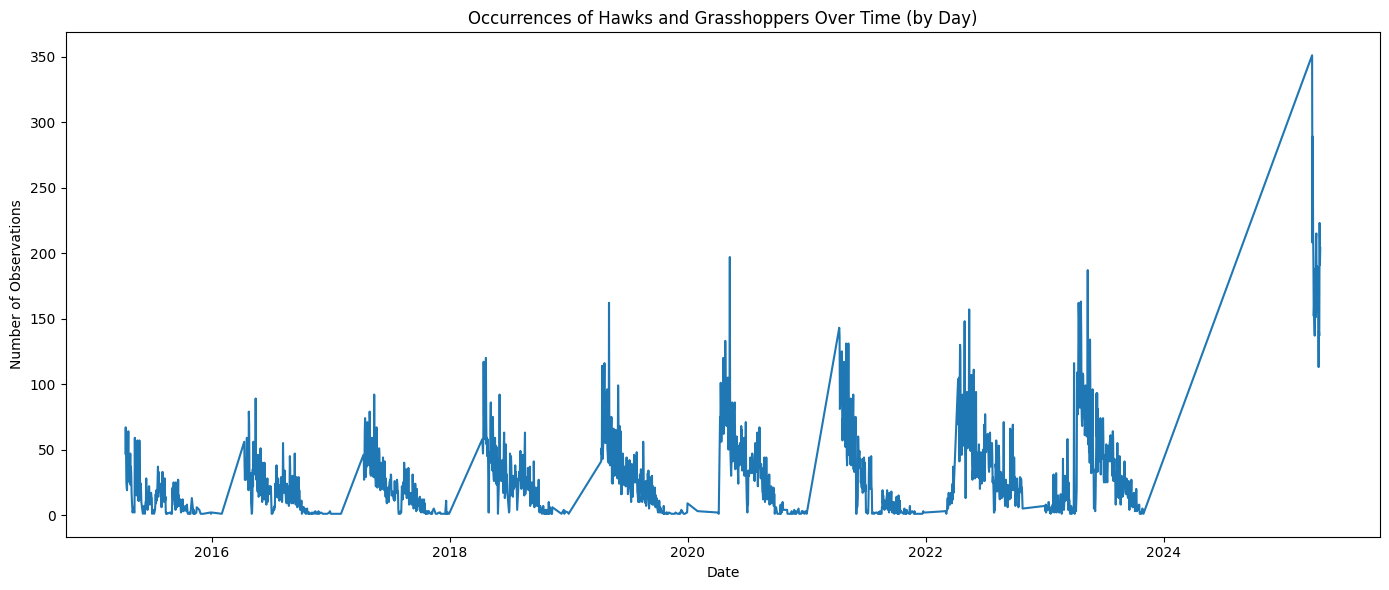

In [184]:
warnings.simplefilter("ignore", category=FutureWarning)

gbif_df['parsedDateNoTime'] = pd.to_datetime(gbif_df['parsedDate'], errors='coerce').dt.date

date_counts_df = gbif_df['parsedDateNoTime'].value_counts().sort_index().reset_index()
date_counts_df = date_counts_df.sort_values('parsedDateNoTime')

plt.figure(figsize=(14, 6))
sns.lineplot(data=date_counts_df, x='parsedDateNoTime', y='count')
plt.title('Occurrences of Hawks and Grasshoppers Over Time (by Day)')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.tight_layout()
plt.show()

This plot shows occurrences for hawks and grasshoppers year over year. With the exception of potential missing data and outliers after 2024, there seems to be an increasing trend in occurrences year over year, which always diminishes as the year ends. This can be attributed to the following most likley:
- Swainson Hawks fly towards South America towards Winter to seek out more food, shelter, and warmer climate
- Grasshoppers mostly die off, leaving hawks to resort to other forms of prey to hunt like rabbits and such
- Population growth seems to follow a logistic growth model 
- California sightings will still be low since most North American native hawks will fly to South America towards end of year
- Climate change (as we'll investigate) might influence the larger number of occurrences towards the end of year as global temperatures rise
- Missing data between years could be leaving gaps and only appears to look like a pattern
- Other natural events that happen periodically could be influencing this influx and gradually decline in occurrences in CA


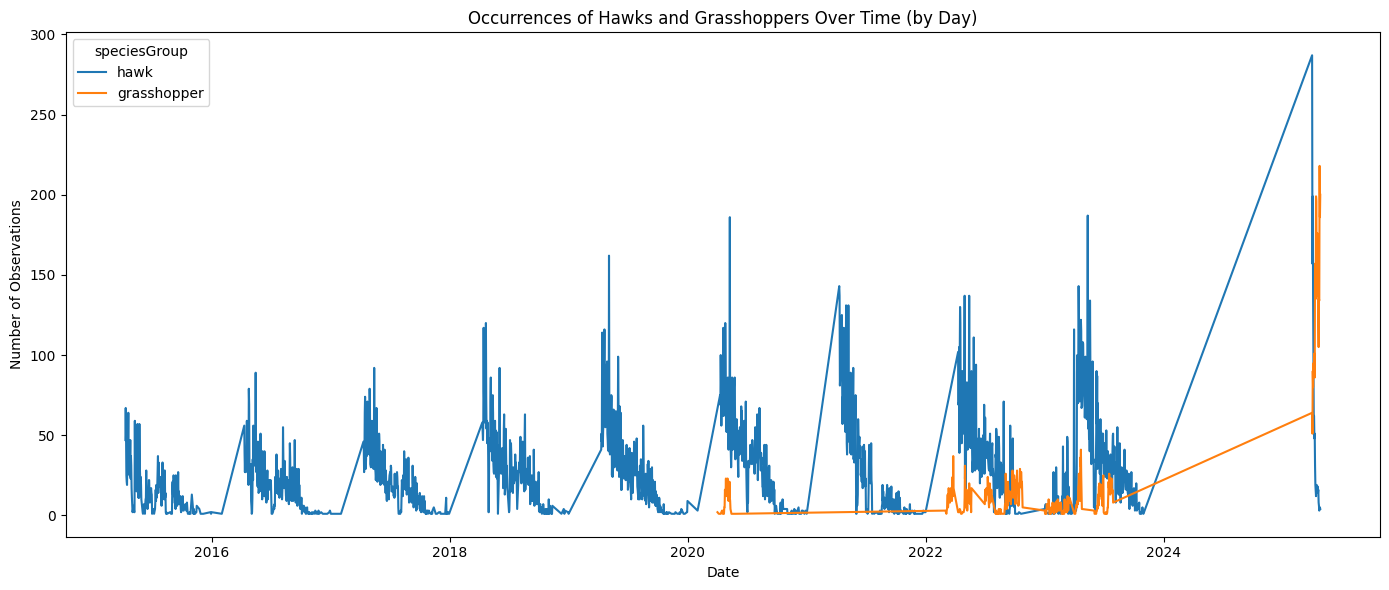

In [187]:
date_counts_df = gbif_df.value_counts(['parsedDateNoTime', 'speciesGroup']).sort_index().reset_index()
date_counts_df = date_counts_df.sort_values('parsedDateNoTime')

plt.figure(figsize=(14, 6))
sns.lineplot(data=date_counts_df, x='parsedDateNoTime', y='count', hue='speciesGroup')
plt.title('Occurrences of Hawks and Grasshoppers Over Time (by Day)')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.tight_layout()
plt.show()

There's definitely a lot of missing grasshopper data before 2020, between 2020-ish and 2022-ish, and between the end of 2023 and 2025 (most likely).

Luckily, we can seek out other prey occurrences from either GBIF or Movebank to help support our analysis while considering confounding factors such as these relationships between predator and prey.

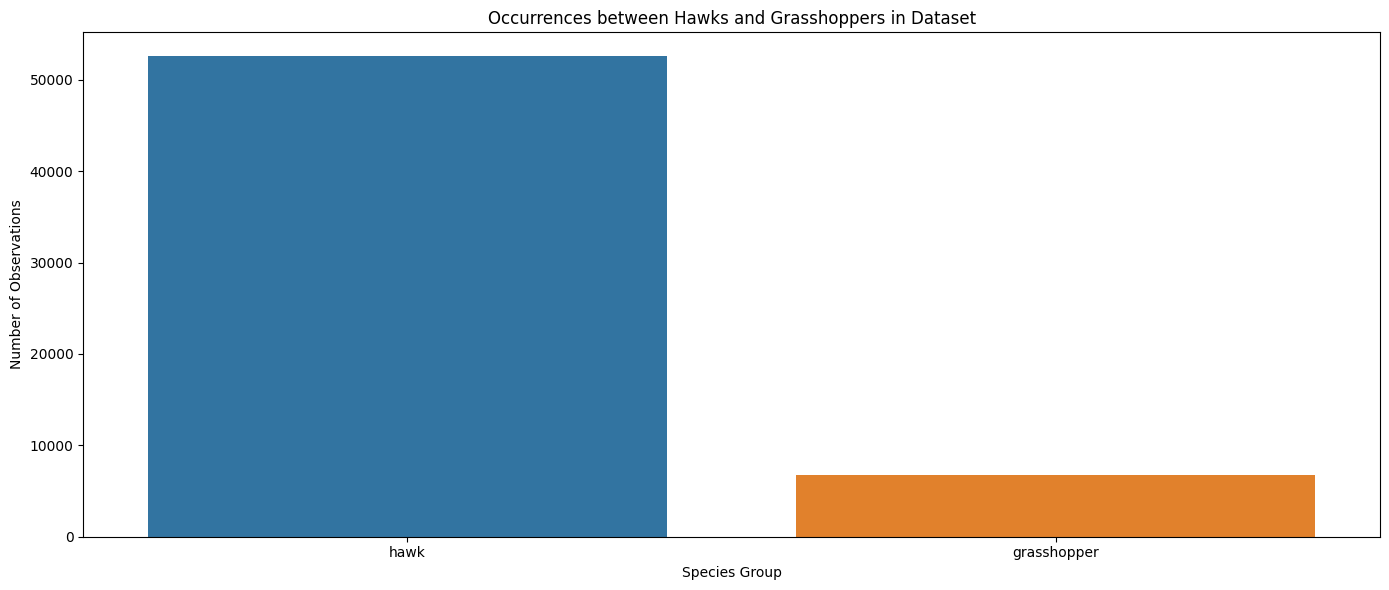

In [189]:
plt.figure(figsize=(14, 6))
sns.countplot(data=gbif_df, x='speciesGroup')
plt.title('Occurrences between Hawks and Grasshoppers in Dataset')
plt.xlabel('Species Group')
plt.ylabel('Number of Observations')
plt.tight_layout()
plt.show()

There's definitely not a fair number of grasshopper occurrences, so hopefully we can find some other data for easily tracked animals as opposed to grasshoppers which could be more difficult (however they are the primary food source in most cases).

Let's move onto collecting data from Movebank, where we'll retrieve data related to animal movements which was collected during  studies in the past. These studies were provided to Movebank to make publicly accessible. 

In [60]:
movebank_base_url = "https://www.movebank.org/movebank/service/"
mb_email = "aw399@humboldt.edu"
mb_username = "aw399"
mb_password = "MQG3xrBg8SWKmyR"

What attributes are there so we know how we can filter down the studies request before requesting the associated tracking data. 

In [61]:
attributes_endpoint = movebank_base_url + "direct-read?attributes"
mb_attr_response = requests.get(attributes_endpoint, auth=HTTPBasicAuth(mb_username, mb_password))
mb_attr_response.text

'Specify one of the following entity types: deployment, deployment, event, event_reduced, individual, individual, sensor, study, study_attribute, tag, tag, tag_type, taxon\nOptional parameter: header-format=underscore\nWhen connecting via https you must specify the parameters user=... and password=...\nSpecify output attributes and filter conditions depending on the entity type.\n\nentity-type=study\nOutput attributes: access_profile_download_id, access_profile_id, acknowledgements, citation, contact_person_id, contact_person_name, default_profile_eventdata_id, default_profile_refdata_id, external_id, external_id_namespace_id, go_public_date, grants_used, has_quota, i_am_collaborator, i_am_owner, i_can_see_data, i_have_download_access, id, is_test, license_terms, license_type, main_location_lat, main_location_long, name, number_of_deployed_locations, number_of_deployments, number_of_individuals, number_of_tags, principal_investigator_address, principal_investigator_email, principal_inv

Let's collect studies where I can see the data and have download access, authenticate with our username and password, converting it into a CSV and then a pandas dataframe, and filter it down by timestamps, main location long/lat, and whether it includes any information about California or its native animals

In [63]:
mb_studies_endpoint = movebank_base_url + "direct-read"

mb_params = {
    "entity_type": "study",
    "i_can_see_data": "true",
    "i_have_download_access": "true"
}

mb_studies_response = requests.get(
    mb_studies_endpoint,
    params=mb_params,
    auth=HTTPBasicAuth(mb_username, mb_password)
)

mb_df_studies = pd.read_csv(StringIO(mb_studies_response.text))

mb_df_studies["timestamp_first_deployed_location"] = pd.to_datetime(mb_df_studies["timestamp_first_deployed_location"], errors='coerce')
mb_df_studies["timestamp_last_deployed_location"] = pd.to_datetime(mb_df_studies["timestamp_last_deployed_location"], errors='coerce')

mb_start = pd.to_datetime("2013-01-01")
mb_end = pd.to_datetime("2023-12-31")

mb_df_filtered = mb_df_studies[
    (mb_df_studies["timestamp_last_deployed_location"] >= mb_start) &
    (mb_df_studies["timestamp_first_deployed_location"] <= mb_end)
]

mb_df_filtered = mb_df_filtered[
    (mb_df_filtered["main_location_lat"] >= 32.0) &
    (mb_df_filtered["main_location_lat"] <= 42.0) &
    (mb_df_filtered["main_location_long"] >= -125.0) &
    (mb_df_filtered["main_location_long"] <= -114.0)
]

mb_df_filtered = mb_df_filtered[mb_df_filtered["name"].str.contains("california|sierra|bay area|america|us|ca|CA|California", case=False, na=False)]

mb_df_filtered.head()

# Download to analyze and filter down the studies we'll be using and animals with data we can work with
# mb_df_filtered.to_csv("movebank_studies.csv")

,acknowledgements,citation,go_public_date,grants_used,has_quota,i_am_owner,id,is_test,license_terms,license_type,...,there_are_data_which_i_cannot_see,i_have_download_access,i_am_collaborator,study_permission,timestamp_first_deployed_location,timestamp_last_deployed_location,number_of_deployed_locations,taxon_ids,sensor_type_ids,contact_person_name
258,NaN,"Huysman AE, CastaÃ±eda XA, Johnson MD. 2021. D...",NaN,NaN,True,False,1426277950,False,NaN,CC_BY,...,False,True,False,na,2016-03-17 16:40:00,2018-07-18 13:09:00,34012.0,Tyto furcata,GPS,ahuysman (Allison Huysman)
384,Support for this study was provided by the S. ...,"BA Barbaree, ME Reiter, CM Hickey, GW Page. 2...",NaN,Grant to the Migratory Bird Conservation Partn...,True,False,1419917362,False,NaN,CC_BY,...,False,True,False,na,2013-02-08 00:00:00,2013-04-23 00:00:00,212.0,"Calidris alpina,Limnodromus scolopaceus",Radio Transmitter,auoptimo (Blake Barbaree)
455,NaN,A more complete version of this dataset is sto...,NaN,NaN,True,False,217784323,False,NaN,CC_BY,...,False,True,False,na,2003-11-05 15:00:00,2016-12-08 14:04:04,679402.0,"Cathartes aura,Coragyps atratus",GPS,dbarber (David Barber)
511,C. G. Putnam provided the template for Figure ...,"Barbaree BA, Reiter ME, Hickey CM, Page GW. 20...",NaN,Support for this study was provided by the S. ...,True,False,1437646021,False,NaN,CC_BY,...,False,True,False,na,2012-08-19 07:00:00,2014-03-18 07:00:00,475.0,Limnodromus scolopaceus,Radio Transmitter,auoptimo (Blake Barbaree)
618,NaN,"Bildstein KL, Barber D, Bechard MJ, GraÃ±a Gri...",NaN,NaN,True,False,481458,False,NaN,CC_BY,...,False,True,False,na,2003-11-05 15:00:00,2025-04-24 00:23:36,2222231.0,"Cathartes aura,Coragyps atratus","GPS,Accessory Measurements",dbarber (David Barber)


We'll be focusing on tracking data starting from 2013 onward. Since not all studies span the full decade, we’ll later trim the NOAA weather dataset to align with the actual periods of movement data. Based on our metadata review, the species we’ll analyze include Barn Owls, Vultures, Red-tailed Hawks, Bobcats, Grey Foxes, and Blue & Fin Whales.

To simplify the data retrieval process, we’ll use pre-downloaded CSVs from Movebank’s archive rather than building a separate function to fetch each study. Below is a reference dictionary with the common animal names as keys and their corresponding Movebank study IDs (where applicable). We’ll load these files into dataframes for further analysis.

The selected Movebank studies reflect a diverse range of ecological and conservation-oriented research across different species in California and surrounding regions. After reviewing the abstracts and descriptions for each of these studies, it's clear that researchers had various objectives — many sought to understand how wildlife movements and mortality are influenced by human development and environmental pressures. 

Some studies focused on habitat fragmentation and the effects of urban sprawl (e.g., Barn Owls and Bobcats), while others monitored the impact of wind energy infrastructure on species like vultures and hawks. The whale study provides marine movement data in response to oceanographic and acoustic conditions, and Swainson's Hawk tracking adds migratory insight, though it was retrieved from a separate archive. Across all these projects, researchers aim to inform conservation planning, identify critical habitat areas, and explore the broader ecological consequences of human activity.

Let's collect tracking data for Blue and Fin whales, remember all of these datasets being read are from download csv files retrieved from Movebank's data archives.

In [71]:
movebank_hawk_df = pd.read_csv("./MovebankData/Space use by Swainson's Hawk (Buteo swainsoni) in the Natomas Basin, California.csv")
movebank_hawk_df.head()
#swainsonHawk_df.shape

,event-id,visible,timestamp,location-long,location-lat,ground-speed,heading,height-above-ellipsoid,migration-stage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,1583635119,True,2011-06-25 16:00:00.000,-121.62333,38.69267,5.14440,149.0,80.0,nestling,gps,Buteo swainsoni,105921,105921,Space use by Swainson's Hawk (Buteo swainsoni)...
1,1583635120,True,2011-06-25 17:00:00.000,-121.62400,38.69433,5.14440,150.0,160.0,nestling,gps,Buteo swainsoni,105921,105921,Space use by Swainson's Hawk (Buteo swainsoni)...
2,1583635121,True,2011-06-25 18:00:00.000,-121.62500,38.69383,5.14440,226.0,190.0,nestling,gps,Buteo swainsoni,105921,105921,Space use by Swainson's Hawk (Buteo swainsoni)...
3,1583635122,True,2011-06-25 19:00:00.000,-121.62300,38.69117,5.65884,210.0,280.0,nestling,gps,Buteo swainsoni,105921,105921,Space use by Swainson's Hawk (Buteo swainsoni)...
4,1583635123,True,2011-06-25 20:00:00.000,-121.62550,38.69267,8.74548,16.0,220.0,nestling,gps,Buteo swainsoni,105921,105921,Space use by Swainson's Hawk (Buteo swainsoni)...


We check the information about the dataframe, converting datatypes where needed

In [72]:
movebank_hawk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18828 entries, 0 to 18827
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   event-id                         18828 non-null  int64  
 1   visible                          18828 non-null  bool   
 2   timestamp                        18828 non-null  object 
 3   location-long                    18828 non-null  float64
 4   location-lat                     18828 non-null  float64
 5   ground-speed                     14289 non-null  float64
 6   heading                          18828 non-null  float64
 7   height-above-ellipsoid           18827 non-null  float64
 8   migration-stage                  18828 non-null  object 
 9   sensor-type                      18828 non-null  object 
 10  individual-taxon-canonical-name  18828 non-null  object 
 11  tag-local-identifier             18828 non-null  object 
 12  individual-local-i

In [73]:
movebank_hawk_df['timestamp'] = pd.to_datetime(movebank_hawk_df['timestamp'])

Now we check for null values amongst the columns, we probably should just get rid of any rows that have NaN long or lat values since we want to map location later on.

In [74]:
movebank_hawk_df.isna().sum()

event-id                              0
visible                               0
timestamp                             0
location-long                         0
location-lat                          0
ground-speed                       4539
heading                               0
height-above-ellipsoid                1
migration-stage                       0
sensor-type                           0
individual-taxon-canonical-name       0
tag-local-identifier                  0
individual-local-identifier           0
study-name                            0
dtype: int64

In [76]:
movebank_hawk_df = movebank_hawk_df.dropna(subset=["location-lat", "location-long"])
movebank_hawk_df.head()

,event-id,visible,timestamp,location-long,location-lat,ground-speed,heading,height-above-ellipsoid,migration-stage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,1583635119,True,2011-06-25 16:00:00,-121.62333,38.69267,5.14440,149.0,80.0,nestling,gps,Buteo swainsoni,105921,105921,Space use by Swainson's Hawk (Buteo swainsoni)...
1,1583635120,True,2011-06-25 17:00:00,-121.62400,38.69433,5.14440,150.0,160.0,nestling,gps,Buteo swainsoni,105921,105921,Space use by Swainson's Hawk (Buteo swainsoni)...
2,1583635121,True,2011-06-25 18:00:00,-121.62500,38.69383,5.14440,226.0,190.0,nestling,gps,Buteo swainsoni,105921,105921,Space use by Swainson's Hawk (Buteo swainsoni)...
3,1583635122,True,2011-06-25 19:00:00,-121.62300,38.69117,5.65884,210.0,280.0,nestling,gps,Buteo swainsoni,105921,105921,Space use by Swainson's Hawk (Buteo swainsoni)...
4,1583635123,True,2011-06-25 20:00:00,-121.62550,38.69267,8.74548,16.0,220.0,nestling,gps,Buteo swainsoni,105921,105921,Space use by Swainson's Hawk (Buteo swainsoni)...


We know the common columns amongst them all and we can make a new species column to track for which animal this is, keeping identifiers for different animals being tracked in their respective studies.

Let's start collecting NOAA data for CA daily weather summaries. We should first check what datasets are available to us in California. They're likely many stations collecting weather summaries periodically since the state is quite large.

In [15]:
noaa_access_token = "sFsHrTCdOCOitEmsjGbCBLgKSdEbKgCP"
noaa_headers = {"token": noaa_access_token}
noaa_base_url = "https://www.ncei.noaa.gov/cdo-web/api/v2/"
CA_FIPS = "FIPS:06"
dataset_endpoint = noaa_base_url + "datasets"
CA_datasets_response = requests.get(dataset_endpoint, params = {"locationid": CA_FIPS}, headers=noaa_headers)
CA_datasets_response.json()

{'metadata': {'resultset': {'offset': 1, 'count': 11, 'limit': 25}},
 'results': [{'uid': 'gov.noaa.ncdc:C00861',
   'mindate': '1763-01-01',
   'maxdate': '2025-04-21',
   'name': 'Daily Summaries',
   'datacoverage': 1,
   'id': 'GHCND'},
  {'uid': 'gov.noaa.ncdc:C00946',
   'mindate': '1763-01-01',
   'maxdate': '2025-04-01',
   'name': 'Global Summary of the Month',
   'datacoverage': 1,
   'id': 'GSOM'},
  {'uid': 'gov.noaa.ncdc:C00947',
   'mindate': '1763-01-01',
   'maxdate': '2025-01-01',
   'name': 'Global Summary of the Year',
   'datacoverage': 1,
   'id': 'GSOY'},
  {'uid': 'gov.noaa.ncdc:C00345',
   'mindate': '1991-06-05',
   'maxdate': '2025-04-22',
   'name': 'Weather Radar (Level II)',
   'datacoverage': 0.95,
   'id': 'NEXRAD2'},
  {'uid': 'gov.noaa.ncdc:C00708',
   'mindate': '1994-05-20',
   'maxdate': '2025-04-18',
   'name': 'Weather Radar (Level III)',
   'datacoverage': 0.95,
   'id': 'NEXRAD3'},
  {'uid': 'gov.noaa.ncdc:C00821',
   'mindate': '2010-01-01',
   

Looks like we want to use the GHCND id for our future requests so we can pull CA data with DAILY weather summaries. It looks like data is available as early as 1763 and is still being updated as of April of 2025. We should check which data categories are available for daily weather so that we can take the readings that will likely matter more for our study. Also, we don't have unlimited time so it's good to start with a subset of presumingly relevant variables.

In [4]:
dataset_code = "GHCND"
datacategories_endpoint = noaa_base_url + "datacategories"
CA_datacat_response = requests.get(datacategories_endpoint, params = {"locationid": CA_FIPS, "datasetid": dataset_code, "limit": "1000"}, headers=noaa_headers).json()
CA_datacat_ids = [i['id'] for i in CA_datacat_response['results']]
CA_datacat_response
CA_datacat_ids

['EVAP', 'LAND', 'PRCP', 'SKY', 'SUN', 'TEMP', 'WATER', 'WIND', 'WXTYPE']

Now we know what data categories are there, we might just want all of them since we're searching for correlations or associations between weather and ecological patterns. Let's look at the datatypes associated with the list of data categories. After doing so, I created a list containing the most seemingly useful ones and gathered a list of tuples with their datatype codes and the description associated with each.

In [5]:
datatype_endpoint = noaa_base_url + "datatypes"
CA_datatype_response = requests.get(datatype_endpoint, params = {"locationid": CA_FIPS, "datasetid": dataset_code, "limit": "200"}, headers=noaa_headers).json()
# filter list of ids based on importance
CA_datatype_ids = [
    "TMIN",  # Min temperature
    "TMAX",  # Max temperature
    "AWND",  # Avg wind speed
    "TSUN",  # Total sunshine
    "WT08",  # Hail
    "TAVG",  # Avg temperature
    "PRCP",  # Precipitation
    "SNOW",  # Snowfall
    "SNWD",  # Snow depth
    ]
CA_datatype_info = [(i['id'], i['name']) for i in CA_datatype_response['results'] if i['id'] in CA_datatype_ids]
CA_datatype_info

[('AWND', 'Average wind speed'),
 ('PRCP', 'Precipitation'),
 ('SNOW', 'Snowfall'),
 ('SNWD', 'Snow depth'),
 ('TAVG', 'Average Temperature.'),
 ('TMAX', 'Maximum temperature'),
 ('TMIN', 'Minimum temperature'),
 ('TSUN', 'Total sunshine for the period'),
 ('WT08', 'Smoke or haze ')]

Now we know the datatypes available across our data categories for the dataset we found, time to grab some data across California, but first let's look at the location categories in case we need it later when searching for location-specific data or something to that effect.

In [6]:
locationcat_endpoint = noaa_base_url + "locationcategories"
CA_loccat_response = requests.get(locationcat_endpoint, params = {"locationid": CA_FIPS, "datasetid": dataset_code}, headers=noaa_headers).json()
CA_loccat_response

{'metadata': {'resultset': {'offset': 1, 'count': 12, 'limit': 25}},
 'results': [{'name': 'City', 'id': 'CITY'},
  {'name': 'Climate Division', 'id': 'CLIM_DIV'},
  {'name': 'Climate Region', 'id': 'CLIM_REG'},
  {'name': 'Country', 'id': 'CNTRY'},
  {'name': 'County', 'id': 'CNTY'},
  {'name': 'Hydrologic Accounting Unit', 'id': 'HYD_ACC'},
  {'name': 'Hydrologic Cataloging Unit', 'id': 'HYD_CAT'},
  {'name': 'Hydrologic Region', 'id': 'HYD_REG'},
  {'name': 'Hydrologic Subregion', 'id': 'HYD_SUB'},
  {'name': 'State', 'id': 'ST'},
  {'name': 'US Territory', 'id': 'US_TERR'},
  {'name': 'Zip Code', 'id': 'ZIP'}]}

I also want to know which stations are available in CA, since we might want more information later to map out the stations and how they correlate with tracking data we receive from Movebank later on. This will important considering the stations have distance between them, and so having a general location is helpful for mapping purposes.

In [7]:
station_endpoint = noaa_base_url + "stations"
CA_station_response = requests.get(station_endpoint, params={"locationid": CA_FIPS, "limit": "1000", "startdate": "2013-01-01", "enddate": "2023-12-31"}, headers=noaa_headers).json()
CA_station_response['results'][:2] # A few station records just so we can get an idea

[{'elevation': 26.5,
  'mindate': '1994-01-01',
  'maxdate': '2015-11-01',
  'latitude': 38.2177,
  'name': 'ACAMPO 5 NE, CA US',
  'datacoverage': 0.9469,
  'id': 'COOP:040010',
  'elevationUnit': 'METERS',
  'longitude': -121.2013},
 {'elevation': 863.5,
  'mindate': '1931-01-01',
  'maxdate': '2013-12-01',
  'latitude': 34.4938,
  'name': 'ACTON ESCONDIDO CANYON, CA US',
  'datacoverage': 0.8986,
  'id': 'COOP:040014',
  'elevationUnit': 'METERS',
  'longitude': -118.2713}]

Time to grab the meteorological or climatological data from NOAA across CA. I'll only be grabbing a decade's worth of data from 2013-2023, and we'll be searching for animal tracking records later that also fit within the range of this time frame.

We can only grab roughly a year's worth after requesting 10 years from API, as a result, we need to iteratively grab a response for each year and then extending our array with that json response result. 

In [ ]:
data_endpoint = noaa_base_url + "data"

all_results = []

for year in range(2013, 2024): 
    startdate = f"{year}-01-01"
    enddate = f"{year}-12-31"
    
    params = {
        "startdate": startdate,
        "enddate": enddate,
        "datasetid": dataset_code, 
        "locationid": CA_FIPS,
        "datatypeid": CA_datatype_ids,
        "units":"standard", 
        "limit": "1000"
    }

    response = requests.get(data_endpoint, params=params, headers=noaa_headers)
    
    if response.status_code == 200:
        year_data = response.json().get("results", [])
        all_results.extend(year_data)
        print(f"Got data for {year}: {len(year_data)} records")
        sleep(3)
    else:
        print(f"Failed for {year} – {response.status_code}: {response.text}")

In [10]:
data_endpoint = noaa_base_url + "data"
all_results = []

for year in range(2013, 2024): 
    startdate = f"{year}-01-01"
    enddate = f"{year}-12-31"
    offset = 0
    year_data = []

    print(f"Starting retrieval for {year}...")

    while True:
        params = {
            "startdate": startdate,
            "enddate": enddate,
            "datasetid": dataset_code, 
            "locationid": CA_FIPS,
            "datatypeid": CA_datatype_ids,
            "units": "standard", 
            "limit": "1000",
            "offset": offset
        }

        response = requests.get(data_endpoint, params=params, headers=noaa_headers)

        if response.status_code == 200:
            page = response.json().get("results", [])
            print(f"Year {year}, Offset {offset}: Retrieved {len(page)} records")
            
            if not page:
                break

            year_data.extend(page)
            offset += 1000
            sleep(10)  # Respectful pause between calls
        else:
            print(f"Failed for {year} at offset {offset} – {response.status_code}: {response.text}")
            print(f"Moving on to next offset {offset+1000}")

    all_results.extend(year_data)
    print(f"Completed {year}: Total {len(year_data)} records\n")


Starting retrieval for 2013...
Year 2013, Offset 0: Retrieved 1000 records
Year 2013, Offset 1000: Retrieved 1000 records
Year 2013, Offset 2000: Retrieved 1000 records
Year 2013, Offset 3000: Retrieved 1000 records
Year 2013, Offset 4000: Retrieved 1000 records
Year 2013, Offset 5000: Retrieved 1000 records
Year 2013, Offset 6000: Retrieved 1000 records
Year 2013, Offset 7000: Retrieved 1000 records
Year 2013, Offset 8000: Retrieved 1000 records
Year 2013, Offset 9000: Retrieved 1000 records
Year 2013, Offset 10000: Retrieved 1000 records
Year 2013, Offset 11000: Retrieved 1000 records
Year 2013, Offset 12000: Retrieved 1000 records
Year 2013, Offset 13000: Retrieved 1000 records
Year 2013, Offset 14000: Retrieved 1000 records
Year 2013, Offset 15000: Retrieved 1000 records
Year 2013, Offset 16000: Retrieved 1000 records
Year 2013, Offset 17000: Retrieved 1000 records
Year 2013, Offset 18000: Retrieved 1000 records
Year 2013, Offset 19000: Retrieved 1000 records
Year 2013, Offset 2000

Year 2013, Offset 118000: Retrieved 1000 records
Year 2013, Offset 119000: Retrieved 1000 records
Year 2013, Offset 120000: Retrieved 1000 records
Year 2013, Offset 121000: Retrieved 1000 records
Year 2013, Offset 122000: Retrieved 1000 records
Year 2013, Offset 123000: Retrieved 1000 records
Year 2013, Offset 124000: Retrieved 1000 records
Failed for 2013 at offset 125000 – 503: <!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>503 Service Unavailable</title>
</head><body>
<h1>Service Unavailable</h1>
<p>The server is temporarily unable to service your
request due to maintenance downtime or capacity
problems. Please try again later.</p>
<p>Additionally, a 503 Service Unavailable
error was encountered while trying to use an ErrorDocument to handle the request.</p>
</body></html>

Moving on to next offset 126000
Year 2013, Offset 125000: Retrieved 1000 records
Year 2013, Offset 126000: Retrieved 1000 records
Year 2013, Offset 127000: Retrieved 1000 records
Year 2013

KeyboardInterrupt: 

We've collected daily weather summary data for CA in standard units, for the provided datatype ids, between 2013 and 2023. We can now use pandas to transform this into a dataframe, where change datatypes, columns, and remove rows of data that have null values.

In [ ]:
CA_NOAA_df = pd.json_normalize(all_results)
CA_NOAA_df.head()

To summarize, the data comes from [NOAA's NCEI API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2) which provides archives for weather data across the United States. This data was collected for CA across 2013 to 2023, and the dataset comes with five variables: date, datatype, station, attributes, and values associated with each datatype. Attributes are divided by a code that's divided by a measurement flag, quality flag, source flag, and time of observation. I won't detail them here but you can find more information [here](https://docs.ropensci.org/rnoaa/articles/ncdc_attributes.html)

In [ ]:
CA_NOAA_df.shape
CA_NOAA_df.isna().sum()
CA_NOAA_df.info()
CA_NOAA_df['date'] = pd.to_datetime(CA_NOAA_df['date'])
CA_NOAA_df['value'] = CA_NOAA_df['value'].astype(int)
CA_NOAA_df.value_counts("datatype") # Appears that there isn't some of the variables available that we requested such as average wind speed, sunshine, smoke/haze, average temperature, and hail
CA_NOAA_df.head()

## Gather Statistics

## Analyze Statistics 

## Use Above to Answer Questions using Inferential Statistics and Prediction

## Answer Questions and Conclude Findings

## References and Citations